In [48]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso, RidgeClassifier, LogisticRegression
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC,SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score,f1_score,roc_auc_score
from sklearn.ensemble import AdaBoostClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_confusion_matrix
from sklearn.preprocessing import OneHotEncoder
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Question 1: Load

* Programmatically download and load into your favorite analytical tool the transactions data. This data, which is in line-delimited JSON format, can be found here
* Please describe the structure of the data. Number of records and fields in each record?
* Please provide some additional basic summary statistics for each field. Be sure to include a count of null, minimum, maximum, and unique values where appropriate.

# Solution

In [3]:
#Loading the data
df = pd.read_json('data/transactions.txt', lines=True)
df.replace('', np.nan, inplace=True)
df['transactionDateTime']=pd.to_datetime(df['transactionDateTime'])

In [4]:
#Displaying rows to get used to data
df

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud
0,737265056,737265056,5000,5000.00,2016-08-13 14:27:32,98.55,Uber,US,US,02,...,NaN,0.00,NaN,NaN,NaN,False,NaN,NaN,False,False
1,737265056,737265056,5000,5000.00,2016-10-11 05:05:54,74.51,AMC #191138,US,US,09,...,NaN,0.00,NaN,NaN,NaN,True,NaN,NaN,False,False
2,737265056,737265056,5000,5000.00,2016-11-08 09:18:39,7.47,Play Store,US,US,09,...,NaN,0.00,NaN,NaN,NaN,False,NaN,NaN,False,False
3,737265056,737265056,5000,5000.00,2016-12-10 02:14:50,7.47,Play Store,US,US,09,...,NaN,0.00,NaN,NaN,NaN,False,NaN,NaN,False,False
4,830329091,830329091,5000,5000.00,2016-03-24 21:04:46,71.18,Tim Hortons #947751,US,US,02,...,NaN,0.00,NaN,NaN,NaN,True,NaN,NaN,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786358,732852505,732852505,50000,48904.96,2016-12-22 18:44:12,119.92,Lyft,US,US,90,...,NaN,1095.04,NaN,NaN,NaN,False,NaN,NaN,False,False
786359,732852505,732852505,50000,48785.04,2016-12-25 16:20:34,18.89,hulu.com,US,US,09,...,NaN,1214.96,NaN,NaN,NaN,False,NaN,NaN,False,False
786360,732852505,732852505,50000,48766.15,2016-12-27 15:46:24,49.43,Lyft,US,US,02,...,NaN,1233.85,NaN,NaN,NaN,False,NaN,NaN,False,False
786361,732852505,732852505,50000,48716.72,2016-12-29 00:30:55,49.89,walmart.com,US,US,09,...,NaN,1283.28,NaN,NaN,NaN,False,NaN,NaN,False,False


# Basic summary statistics

In [5]:
df.describe()

,accountNumber,customerId,creditLimit,availableMoney,transactionAmount,cardCVV,enteredCVV,cardLast4Digits,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,posOnPremises,recurringAuthInd
count,7.863630e+05,7.863630e+05,786363.000000,786363.000000,786363.000000,786363.000000,786363.000000,786363.000000,0.0,786363.000000,0.0,0.0,0.0,0.0,0.0
mean,5.372326e+08,5.372326e+08,10759.464459,6250.725369,136.985791,544.467338,544.183857,4757.417799,NaN,4508.739089,NaN,NaN,NaN,NaN,NaN
std,2.554211e+08,2.554211e+08,11636.174890,8880.783989,147.725569,261.524220,261.551254,2996.583810,NaN,6457.442068,NaN,NaN,NaN,NaN,NaN
min,1.000881e+08,1.000881e+08,250.000000,-1005.630000,0.000000,100.000000,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
25%,3.301333e+08,3.301333e+08,5000.000000,1077.420000,33.650000,310.000000,310.000000,2178.000000,NaN,689.910000,NaN,NaN,NaN,NaN,NaN
50%,5.074561e+08,5.074561e+08,7500.000000,3184.860000,87.900000,535.000000,535.000000,4733.000000,NaN,2451.760000,NaN,NaN,NaN,NaN,NaN
75%,7.676200e+08,7.676200e+08,15000.000000,7500.000000,191.480000,785.000000,785.000000,7338.000000,NaN,5291.095000,NaN,NaN,NaN,NaN,NaN
max,9.993896e+08,9.993896e+08,50000.000000,50000.000000,2011.540000,998.000000,998.000000,9998.000000,NaN,47498.810000,NaN,NaN,NaN,NaN,NaN


# Data Dictionary

|Pos|Column|Data Type|Unique Values/Range|Count of Null values|
|:-|:-|:-|:-|:-|
|1|accountNumber|Categorical,Nominal|100088067 to 999389635|0|
|2|customerId|Categorical,Nominal|100088067 to 999389635|0|
|3|creditLimit|Numerical,Integer|250 to 50000|0|
|4|availableMoney|Numerical,Float|-1005.63 to 50000.00|0|
|5|transactionDateTime|Categorical,Ordinal,Date|'2016-01-01T00:01:02' to '2016-12-30T23:59:45'|0|
|6|transactionAmount|Numerical,Float|0.00 to 2011.54|0|
|7|merchantName|Categorical,Nominal|2490 unique merchant names|0|
|8|acqCountry|Categorical,Nominal|'US', nan, 'CAN', 'MEX', 'PR'|4562|
|9|merchantCountryCode|Categorical,Nominal|'US', nan, 'CAN', 'MEX', 'PR'|724|
|10|posEntryMode|Categorical,Nominal|'02', '09', '05', '80', '90', nan|4054|
|11|posConditionCode|Categorical,Nominal|'01', '08', '99', nan|409|
|12|merchantCategoryCode|Categorical,Nominal|'rideshare','entertainment','mobileapps','fastfood','food_delivery','auto','online_retail','gym', 'health','personal care', 'food', 'fuel', 'online_subscriptions','online_gifts', 'hotels', 'airline', 'furniture', 'subscriptions','cable/phone'|0|
|13|currentExpDate|Categorical,Ordinal,Date|'01/2020' to '12/2032'|0|
|14|accountOpenDate|Categorical,Ordinal,Date|'1989-08-22' to '2015-12-31'|0|
|15|dateOfLastAddressChange|Categorical,Ordinal,Date|'1989-08-22' to '2016-12-30'|0|
|16|cardCVV|Categorical,Nominal|100 to 998|0|
|17|enteredCVV|Categorical,Nominal|0 to 998|0|
|18|cardLast4Digits|Categorical,Nominal|0 to 9998|0|
|19|transactionType|Categorical,Nominal|'PURCHASE','ADDRESS_VERIFICATION','REVERSAL',nan|698|
|20|echoBuffer|Categorical,Nominal|nan|786363|
|21|currentBalance|Numerical,Float|0.0 to 47498.81|0|
|22|merchantCity|Categorical,Nominal|nan|786363|
|23|merchantState|Categorical,Nominal|nan|786363|
|24|merchantZip|Categorical,Nominal|nan|786363|
|25|cardPresent|Categorical,Bool|False,True|0|
|26|posOnPremises|Categorical,Bool|False,True|786363|
|27|recurringAuthInd|Categorical,Nominal|nan|786363|
|28|expirationDateKeyInMatch|Categorical,Bool|False,True|0|
|29|isFraud|Categorical,Bool|False,True|0|


# Question 2: Plot

* Plot a histogram of the processed amounts of each transaction, the transactionAmount column.
* Report any structure you find and any hypotheses you have about that structure.

# Solution

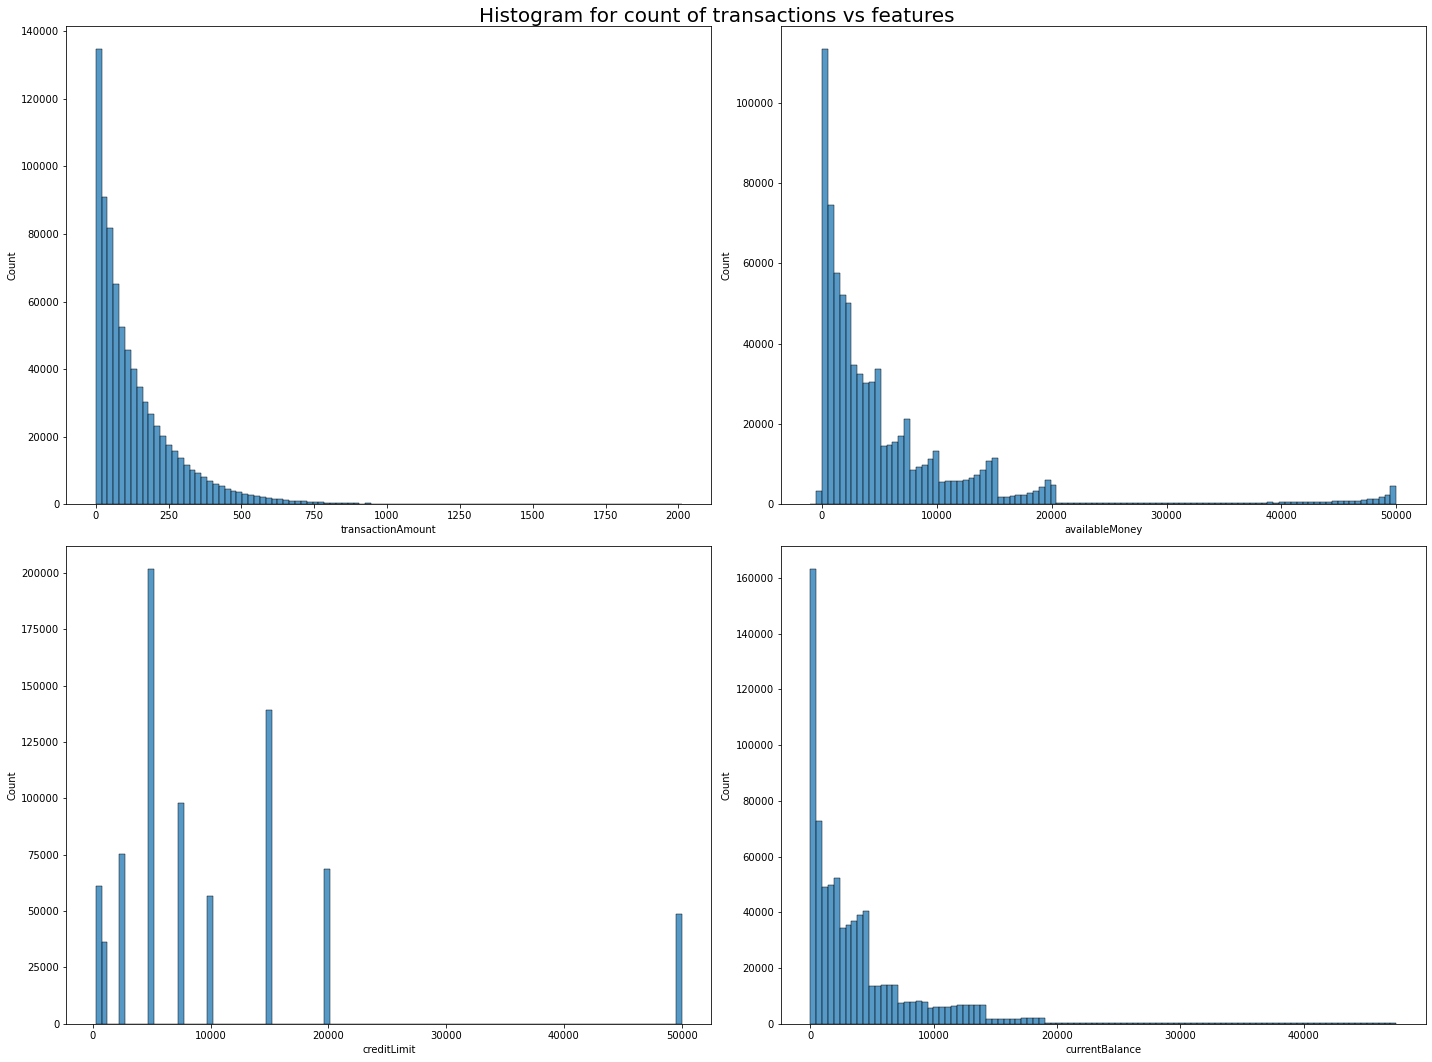

In [18]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20,15))
sns.histplot(x="transactionAmount",ax=ax[0][0], data=df,bins=100)
sns.histplot(x="availableMoney",ax=ax[0][1], data=df,bins=100)
sns.histplot(x="creditLimit",ax=ax[1][0], data=df,bins=100)
sns.histplot(x="currentBalance",ax=ax[1][1], data=df,bins=100)
fig.suptitle('Histogram for count of transactions vs features', size=20)
fig.tight_layout()
plt.show()

### Description

* Each bar chart above denotes count of transactions vs value of different features

* My main observations are -
* Most of the transactions are low volume which shows customers tend to spend more on every day items
* Most of the customers are using their 80% credit limit which can contribute to more revenue but has a higher risk of default
* Credit limit and current balance are also on similar lines

__From my observation, all these 4 histograms are following 80-20 principle where 80% of customers are contributing to 20% of company revenue and vice versa. This shows that company must focus on the elite 20% population which is giving us 80% of the portfolio__

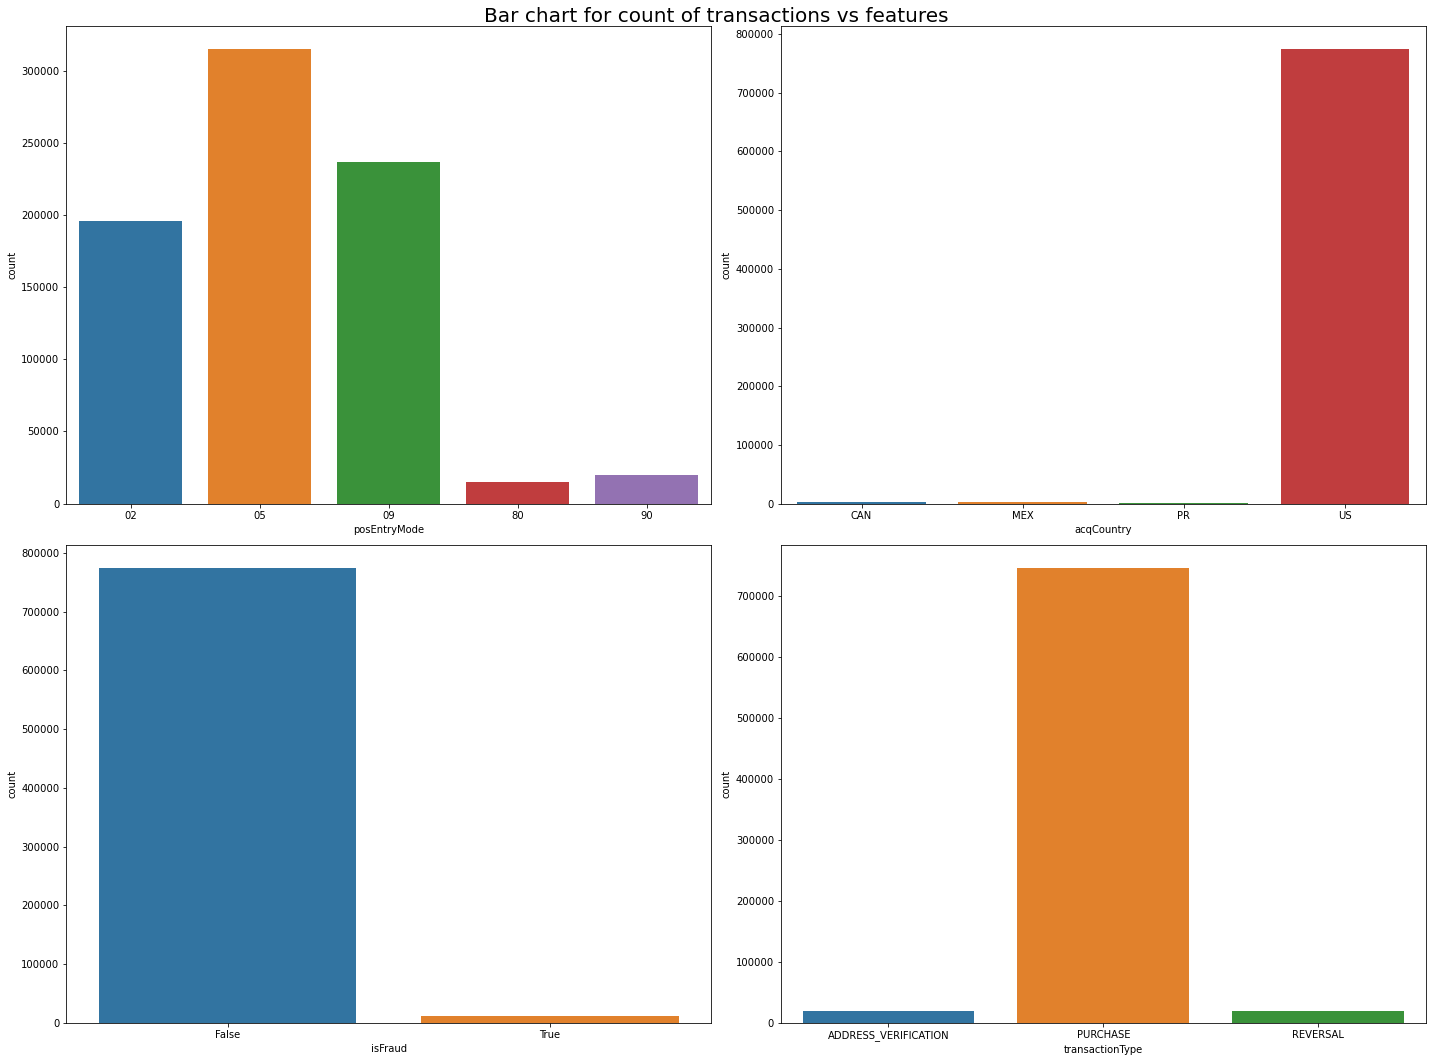

In [19]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20,15))
df1=df.groupby(by=['posEntryMode'])['accountNumber'].agg(['count']).reset_index()
sns.barplot(x="posEntryMode",ax=ax[0][0],y="count", data=df1)

df1=df.groupby(by=['acqCountry'])['accountNumber'].agg(['count']).reset_index()
sns.barplot(x="acqCountry",ax=ax[0][1],y="count", data=df1)

df1=df.groupby(by=['isFraud'])['accountNumber'].agg(['count']).reset_index()
sns.barplot(x="isFraud",ax=ax[1][0],y="count", data=df1)

df1=df.groupby(by=['transactionType'])['accountNumber'].agg(['count']).reset_index()
sns.barplot(x="transactionType",ax=ax[1][1],y="count", data=df1)

fig.suptitle('Bar chart for count of transactions vs features', size=20)
fig.tight_layout()
plt.show()

### Description

Each bar chart above denotes count of transactions vs categories of different features

My main observations are - 
* Maximum transactions are taking place in POS entry code 05 which I assume is the online POS code
* US is the largest market for Capital one in terms of number of transactions
* The fraud category is highly imbalanced with too less Fraud transactions (which is good) to analyze
* Maximum transactions are purchase transactions which contribute to revenue earned by Capital One

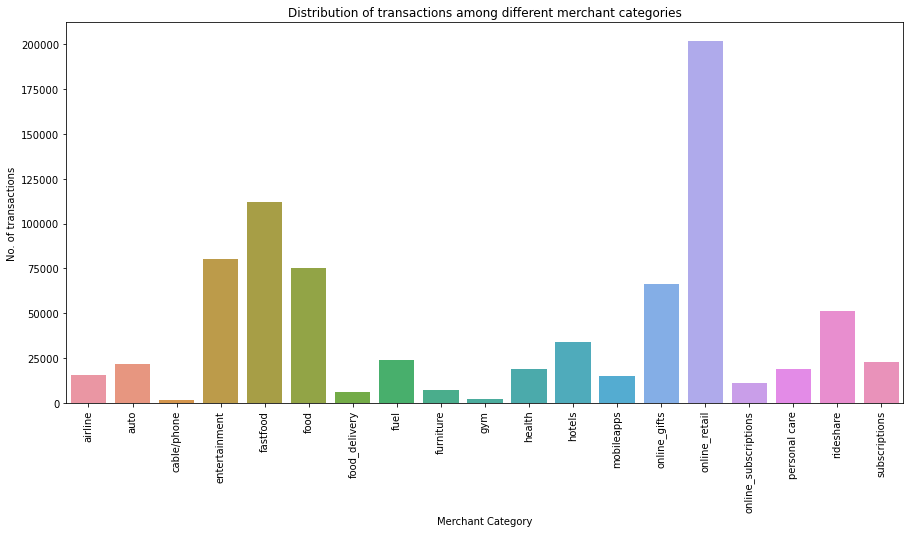

In [31]:
plt.figure(figsize=(15,7))
df1=df.groupby(by=['merchantCategoryCode'])['accountNumber'].agg(['count']).reset_index()
ax=sns.barplot(x="merchantCategoryCode",y="count", data=df1)
plt.xticks(rotation=90)
plt.title('Distribution of transactions among different merchant categories', size=12)
ax.set_ylabel('No. of transactions')
ax.set_xlabel('Merchant Category')
plt.show()

### Description

* We can observe that online retail accounts for maximum portfolio of card transactions

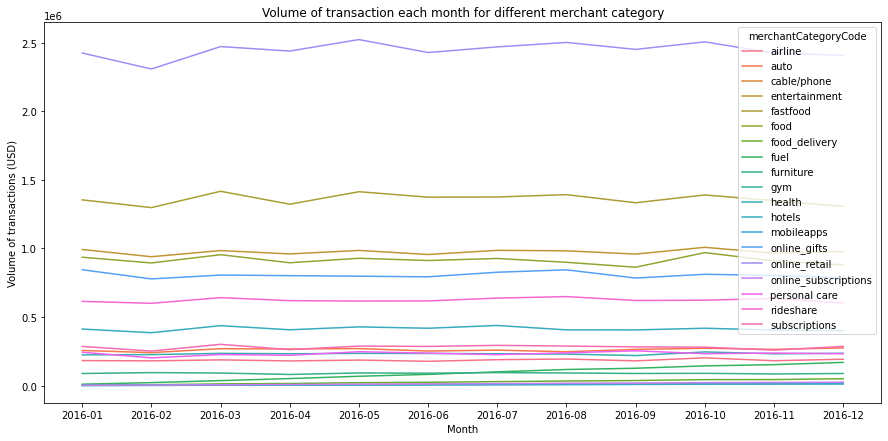

In [32]:
plt.figure(figsize=(15,7))
df['yearMonth']=[str(datetime.date(i.year, i.month, 1))[0:7] for i in df['transactionDateTime']]
df1=df.sort_values(['yearMonth']).groupby(by=['yearMonth','merchantCategoryCode'])['transactionAmount'].agg(['sum']).reset_index()
ax=sns.lineplot(x="yearMonth", y="sum",data=df1,hue="merchantCategoryCode")
plt.title('Volume of transaction each month for different merchant category', size=12)
ax.set_ylabel('Volume of transactions (USD)')
ax.set_xlabel('Month')
plt.show()


### Description

* Looking at Month over month trends we can observe that Airline travel occupies major chunk in terms of volume of transactions
* Online retail which has maximum transactions, is pretty low on volume of transactions

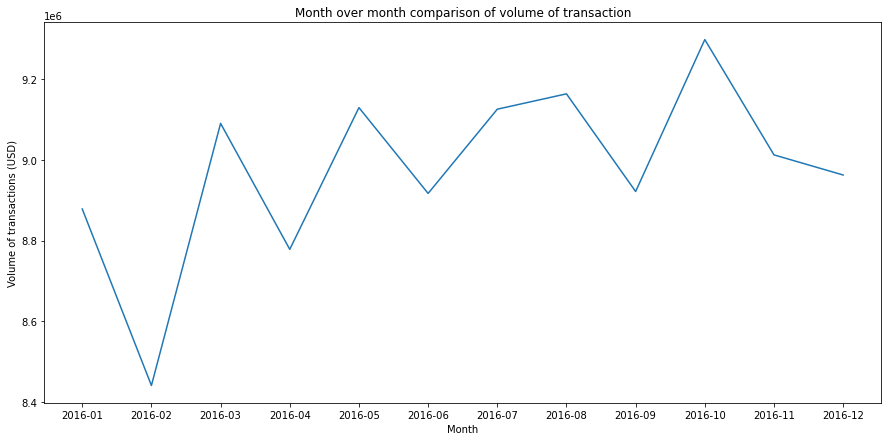

In [33]:
plt.figure(figsize=(15,7))
df['yearMonth']=[str(datetime.date(i.year, i.month, 1))[0:7] for i in df['transactionDateTime']]
df1=df.sort_values(['yearMonth']).groupby(by=['yearMonth'])['transactionAmount'].agg(['sum']).reset_index()
ax=sns.lineplot(x="yearMonth", y="sum",data=df1)
plt.title('Month over month comparison of volume of transaction', size=12)
ax.set_ylabel('Volume of transactions (USD)')
ax.set_xlabel('Month')
plt.show()

### Description

* The transaction volume increased to maximum in October 2016 which can be due to many holidays falling in US during that time.
* Minimum transaction volume was observed in February, reason being most of US is cold at that time and people travel less in Airlines which occupies maximum share in volume.

# Question 3: Data Wrangling - Duplicate Transactions
You will notice a number of what look like duplicated transactions in the data set. One type of duplicated transaction is a reversed transaction, where a purchase is followed by a reversal. Another example is a multi-swipe, where a vendor accidentally charges a customer's card multiple times within a short time span.
*	Can you programmatically identify reversed and multi-swipe transactions?
*	What total number of transactions and total dollar amount do you estimate for the reversed transactions? For the multi-swipe transactions? (please consider the first transaction to be "normal" and exclude it from the number of transaction and dollar amount counts)
*	Did you find anything interesting about either kind of transaction?


# Solution

In [6]:
df.groupby(by='transactionType')['transactionAmount'].agg(['sum','count'])

,sum,count
transactionType,,
ADDRESS_VERIFICATION,0.00,20169
PURCHASE,104790305.25,745193
REVERSAL,2821792.50,20303


### Description

* We can programmatically identify reverse by looking at transactionType in the data.
* For getting duplicate transcations we can sort the data by transaction date time.
* Then we check for any duplicate transaction that happened within 60 seconds (for a particular account with same amount) and marking them as Duplicate = True
*Source credit: https://stackoverflow.com/questions/56517004/mark-duplicates-based-on-time-difference-between-successive-rows

* The reverse transactions sum to $2,821,792.5 spread out among 20,303 transactions

In [35]:
df['Duplicate'] = (df.where(df['transactionType']=='PURCHASE').sort_values(['transactionDateTime'])\
                       .groupby(['accountNumber','transactionAmount'], sort=False)\
                       ['transactionDateTime']\
                       .diff()\
                       .dt.total_seconds()\
                       .lt(120))
df.groupby(by='Duplicate')['transactionAmount'].agg(['sum','count'])

,sum,count
Duplicate,,
False,1.040520e+08,740300
True,7.382677e+05,4893


### Description

* Duplicate transactions sum to $370,657.51 spread out among 2,427 transactions

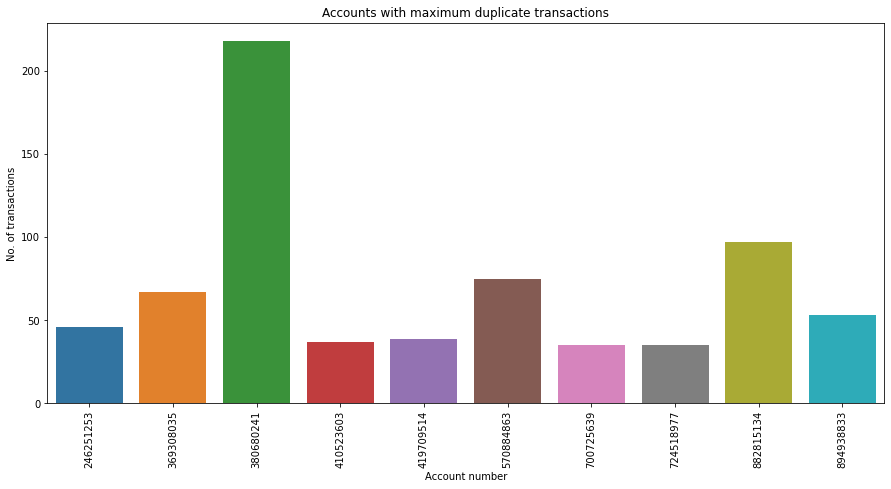

In [37]:
plt.figure(figsize=(15,7))
df1=df.loc[(df['Duplicate']==True)]
df1=df1.groupby(by='accountNumber')['accountNumber'].agg(['count']).sort_values(['count'],ascending=False).reset_index().iloc[:10,:]
ax=sns.barplot(x="accountNumber",y="count", data=df1)
plt.xticks(rotation=90)
plt.title('Accounts with maximum duplicate transactions', size=12)
ax.set_ylabel('No. of transactions')
ax.set_xlabel('Account number')
plt.show()

### Description

This specific account number '380680241' has the highest number of duplicate transactions

In [93]:
df.loc[(df['Duplicate']==True)&(df['accountNumber']==380680241)].sort_values(by=['transactionAmount'],ascending=False)

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud,yearMonth,Duplicate
251693,380680241,380680241,5000,1364.82,2016-05-06 20:26:10,886.14,Blue Mountain Online Services,US,US,02,08,online_gifts,08/2030,2014-06-21,2016-05-06,869,869,593,PURCHASE,NaN,3635.18,NaN,NaN,NaN,False,NaN,NaN,False,False,2016-05,True
249166,380680241,380680241,5000,2939.67,2016-04-08 20:57:56,824.46,Fresh eCards,US,US,09,01,online_gifts,12/2030,2014-06-21,2016-04-07,869,869,593,PURCHASE,NaN,2060.33,NaN,NaN,NaN,False,NaN,NaN,False,False,2016-04,True
258121,380680241,380680241,5000,4325.79,2016-07-17 13:53:58,616.56,Blue Mountain eCards,US,US,09,01,online_gifts,06/2026,2014-06-21,2016-07-15,869,869,593,PURCHASE,NaN,674.21,NaN,NaN,NaN,False,NaN,NaN,False,False,2016-07,True
265148,380680241,380680241,5000,817.74,2016-10-05 02:27:17,551.55,Mobile eCards,US,US,09,01,online_gifts,04/2027,2014-06-21,2016-09-22,869,869,593,PURCHASE,NaN,4182.26,NaN,NaN,NaN,False,NaN,NaN,False,False,2016-10,True
263273,380680241,380680241,5000,3064.95,2016-09-14 05:47:58,465.21,Next Day eCards,US,US,05,01,online_gifts,09/2024,2014-06-21,2016-09-01,869,869,593,PURCHASE,NaN,1935.05,NaN,NaN,NaN,False,NaN,NaN,False,False,2016-09,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258026,380680241,380680241,5000,915.46,2016-07-16 13:31:28,8.03,Next Day eCards,US,US,02,08,online_gifts,12/2030,2014-06-21,2016-07-15,869,869,593,PURCHASE,NaN,4084.54,NaN,NaN,NaN,False,NaN,NaN,False,False,2016-07,True
247366,380680241,380680241,5000,1876.26,2016-03-19 09:04:50,5.22,Next Day Online Services,US,US,02,08,online_gifts,06/2028,2014-06-21,2016-03-17,869,869,593,PURCHASE,NaN,3123.74,NaN,NaN,NaN,False,NaN,NaN,False,False,2016-03,True
250620,380680241,380680241,5000,1585.35,2016-04-24 15:08:59,2.64,Mobile eCards,US,US,02,01,online_gifts,01/2023,2014-06-21,2016-04-07,869,869,593,PURCHASE,NaN,3414.65,NaN,NaN,NaN,False,NaN,NaN,False,False,2016-04,True
258732,380680241,380680241,5000,1070.04,2016-07-24 15:01:25,2.24,Fresh Online Services,US,US,80,01,online_gifts,11/2024,2014-06-21,2016-07-20,869,869,593,PURCHASE,NaN,3929.96,NaN,NaN,NaN,False,NaN,NaN,False,False,2016-07,True


### Description

* If look into this specific account we find out that most of the duplicate transactions are online gifts.
* They may or may not be duplicate but there is a higher chance that same amount gift cards maybe purchased twice.
* We might need to exclude such type of transactions if they are legit

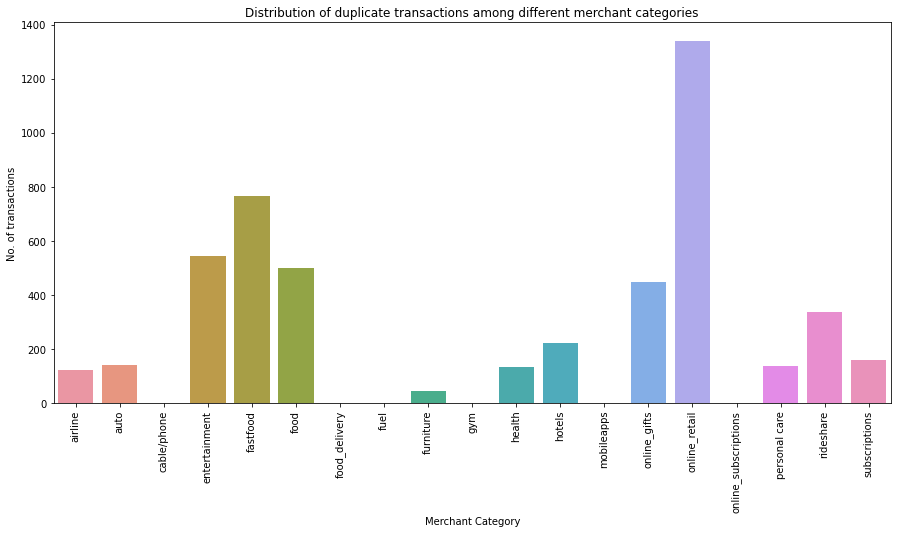

In [38]:
plt.figure(figsize=(15,7))
df1=df.groupby(by=['merchantCategoryCode'])['Duplicate'].agg(['sum']).reset_index()
ax=sns.barplot(x="merchantCategoryCode",y="sum", data=df1)


plt.title('Distribution of duplicate transactions among different merchant categories', size=12)
ax.set_ylabel('No. of transactions')
ax.set_xlabel('Merchant Category')
plt.show()

### Description

* We can observe that maximum cases of duplicacy is in online retail which is opposite to what I believed to be a case of human error at a physical POS machine.
* This shows that due to some technical issues in payment gateway, transactions are happening twice.

In [76]:
df1=df.groupby(by=['isFraud'])['Duplicate'].agg(['sum']).reset_index()
df1

,isFraud,sum
0,False,2379
1,True,48


### Description

* There are lesser fraud transactions in duplicate which is opposed to what I believed. Similar to isFraud bar chart earlier, we can observe imbalanced classes

# Question 4: Model
Fraud is a problem for any bank. Fraud can take many forms, whether it is someone stealing a single credit card, to large batches of stolen credit card numbers being used on the web, or even a mass compromise of credit card numbers stolen from a merchant via tools like credit card skimming devices.
* Each of the transactions in the dataset has a field called isFraud. Please build a predictive model to determine whether a given transaction will be fraudulent or not. Use as much of the data as you like (or all of it).
* Provide an estimate of performance using an appropriate sample, and show your work.
* Please explain your methodology (modeling algorithm/method used and why, what features/data you found useful, what questions you have, and what you would do next with more time)


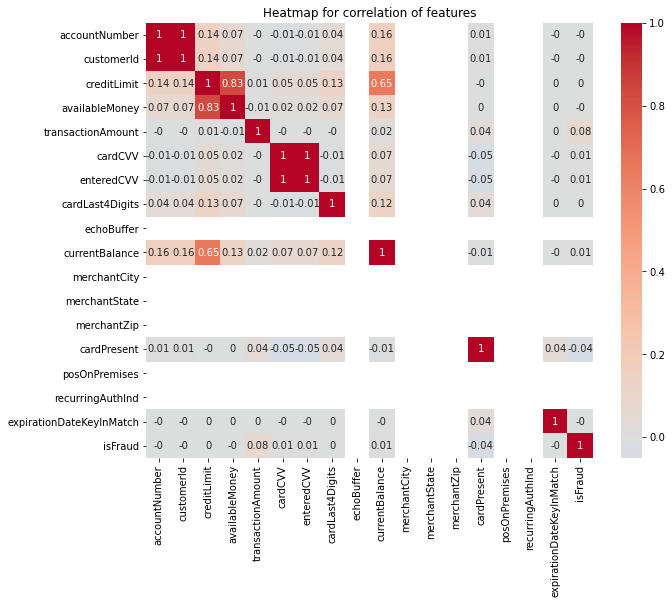

In [39]:
correlation_matrix = df.corr().round(2)
plt.figure(figsize=(10,8))
ax=sns.heatmap(data=correlation_matrix, annot=True, center=0.0, cmap='coolwarm')
plt.title('Heatmap for correlation of features before preprocessing', size=12)
plt.show()

### Description

* Plotting heap map for all available features without any preproccesing

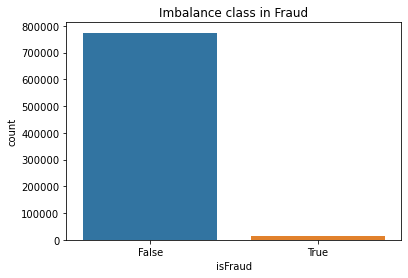

In [41]:
df1=df.groupby(by=['isFraud'])['accountNumber'].agg(['count']).reset_index()
ax=sns.barplot(x="isFraud",y="count", data=df1)
plt.title('Imbalance class in Fraud', size=12)
plt.show()

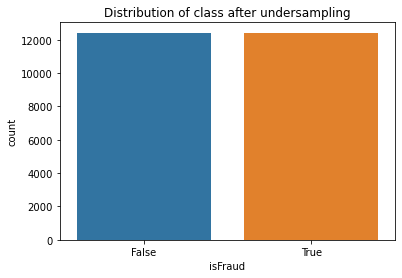

In [50]:
not_fraud_indices = df[df.isFraud == 0].index
sample_size = sum(df.isFraud == 1)  
random_indices = np.random.choice(not_fraud_indices, sample_size, replace=False)
not_fraud_sample = df.loc[random_indices]
sample=pd.concat((df[df['isFraud']==1],not_fraud_sample),axis=0)
sample=sample.reset_index(drop=True)
df1=sample.groupby(by=['isFraud'])['accountNumber'].agg(['count']).reset_index()
ax=sns.barplot(x="isFraud",y="count", data=df1)
plt.title('Distribution of class after undersampling', size=12)
plt.show()

### Description

* To tackle class imbalance problem, we undersample Non-fraud transactions to match number of fraud transactions.
* This makes it better to predict as each class is represented equally

In [51]:
cat_col=['acqCountry','merchantCountryCode','posEntryMode',\
'posConditionCode','merchantCategoryCode','transactionType']
cat_df=sample[cat_col]
bool_col=['cardPresent','expirationDateKeyInMatch','isFraud']
bool_df=sample[bool_col].astype(int)
features=['creditLimit','availableMoney','currentBalance']
features_df=sample[features]

scaler = MinMaxScaler()
features_df=pd.DataFrame(scaler.fit_transform(features_df),columns=features_df.columns)

### Description

* Seperated categorical features from continuous features.
* Normalized continuous features as they have larger mangnitude and can include bias in the model
* Kept bool variables seperate as they are binary categorical

In [52]:
cat_df.fillna(method="ffill",inplace=True)
ohe=OneHotEncoder()
ohe.fit(cat_df)
ohe_df = pd.DataFrame(ohe.transform(cat_df).toarray(),columns=ohe.get_feature_names())
features_df=pd.concat([features_df, ohe_df,bool_df], axis=1)
features_df

C:\Users\shlok\anaconda3\lib\site-packages\pandas\core\frame.py:4462: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


,creditLimit,availableMoney,currentBalance,x0_CAN,x0_MEX,x0_PR,x0_US,x1_CAN,x1_MEX,x1_PR,x1_US,x2_02,x2_05,x2_09,x2_80,x2_90,x3_01,x3_08,x3_99,x4_airline,x4_auto,x4_cable/phone,x4_entertainment,x4_fastfood,x4_food,x4_food_delivery,x4_fuel,x4_furniture,x4_gym,x4_health,x4_hotels,x4_mobileapps,x4_online_gifts,x4_online_retail,x4_online_subscriptions,x4_personal care,x4_rideshare,x4_subscriptions,x5_ADDRESS_VERIFICATION,x5_PURCHASE,x5_REVERSAL,cardPresent,expirationDateKeyInMatch,isFraud
0,1.00,0.18,0.87,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0,0,1
1,0.30,0.29,0.02,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0,0,1
2,0.30,0.28,0.03,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0,0,1
3,0.30,0.19,0.13,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0,0,1
4,0.30,0.12,0.21,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24829,0.01,0.02,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0,0,0
24830,0.10,0.05,0.06,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1,0,0
24831,0.40,0.40,0.01,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0,0,0
24832,0.30,0.31,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0,0,0


### Description

* Performed one hot encoding to categorical variables to convert them into numbers (which model can understand)

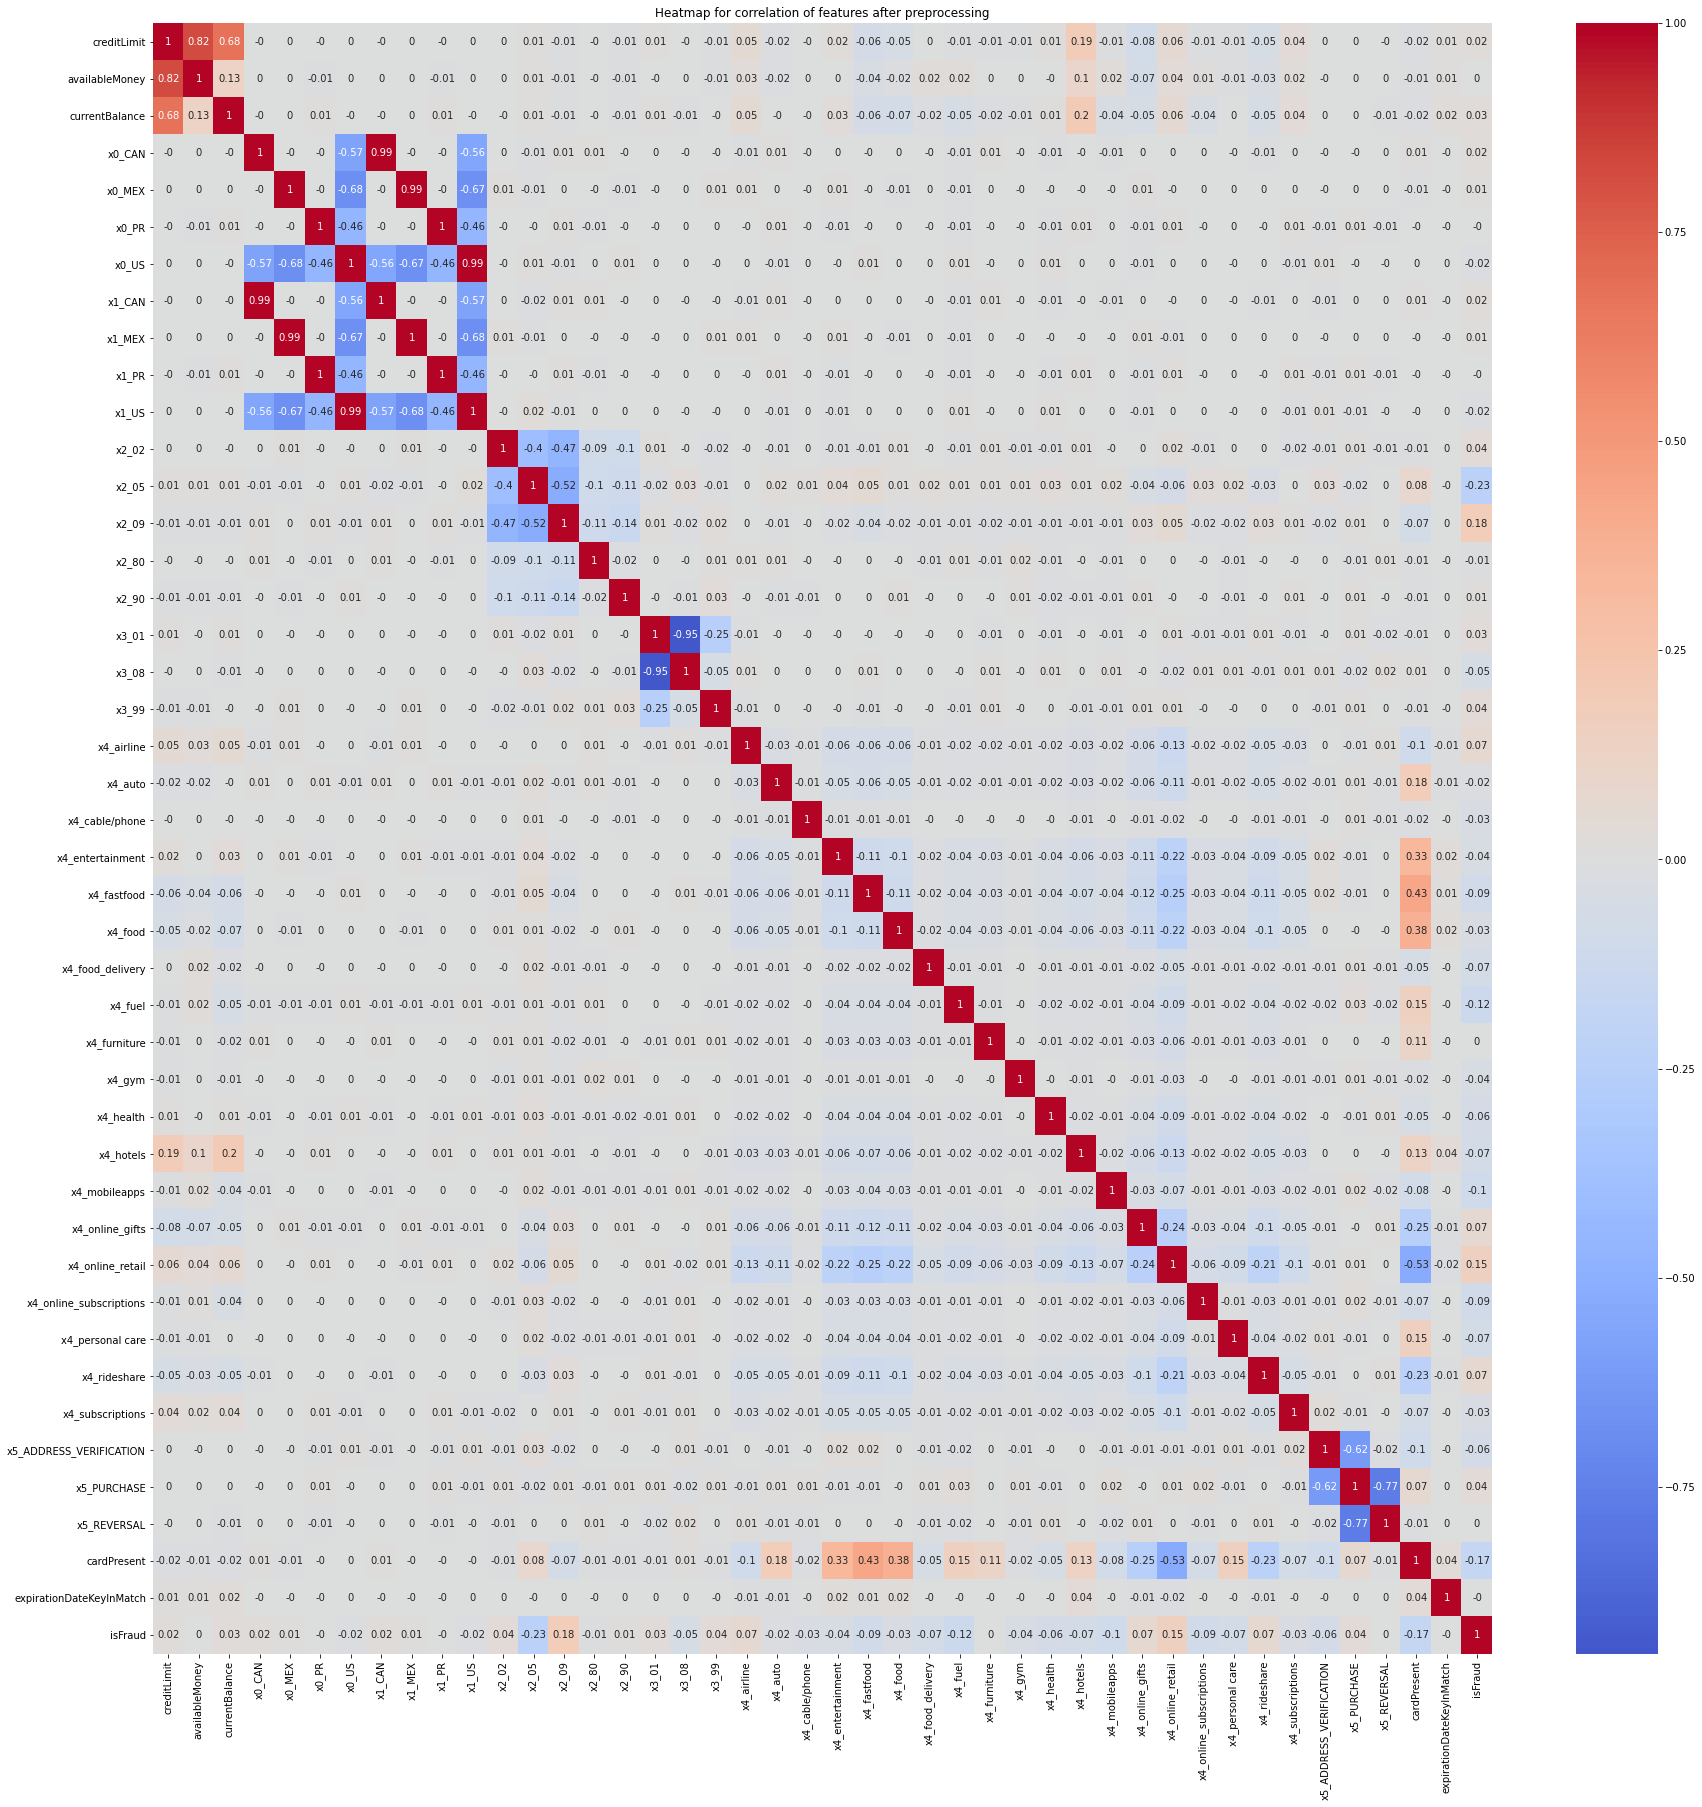

In [53]:
correlation_matrix = features_df.corr().round(2)
plt.figure(figsize=(30,30))
ax=sns.heatmap(data=correlation_matrix, annot=True, center=0.0, cmap='coolwarm')
plt.title('Heatmap for correlation of features after preprocessing', size=12)
plt.show()

### Description

* In the above heat map we can observe that isFraud is not highly correlated to a specific feature. 
* There are certain features like POS code 05 and Card presence which gives us an idea that Fraud transactions are happening in certain types of transaction

# Method 1 (Using all features with complex models)

In [27]:
correlation_matrix = features_df.corr().round(2)
correlation_matrix=correlation_matrix.reset_index()
final_features=correlation_matrix['index']
final_features=final_features[:-1]

target=features_df['isFraud']
features_new=features_df[final_features]
features_new

,creditLimit,availableMoney,currentBalance,x0_CAN,x0_MEX,x0_PR,x0_US,x1_CAN,x1_MEX,x1_PR,...,x4_online_retail,x4_online_subscriptions,x4_personal care,x4_rideshare,x4_subscriptions,x5_ADDRESS_VERIFICATION,x5_PURCHASE,x5_REVERSAL,cardPresent,expirationDateKeyInMatch
0,1.000000,0.182323,0.871767,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0
1,0.296482,0.290991,0.018664,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0
2,0.296482,0.282861,0.027331,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0
3,0.296482,0.188839,0.127574,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0
4,0.296482,0.115331,0.205944,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24829,0.000000,0.017078,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0
24830,0.195980,0.073232,0.145507,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0
24831,0.296482,0.222154,0.092054,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0,0
24832,1.000000,0.344337,0.699036,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0


### Description

These are all the relevant features being used for model

In [14]:
def classifiers(X_train,X_test,y_train,y_test):
    
    #Basic Classifiers
    rf = RandomForestClassifier(random_state=42,n_jobs=-1)
    dtc = DecisionTreeClassifier(random_state=42)
    log = LogisticRegression(random_state=42,max_iter=1000,C=0.001,fit_intercept=False,n_jobs=-1,penalty='none')
    svc = LinearSVC(random_state=42,max_iter=2000)
    rid = RidgeClassifier(random_state=42)
    ada = AdaBoostClassifier(random_state=42)
    cat=CatBoostClassifier(random_state=42,silent=True,depth=3,l2_leaf_reg=5,learning_rate=0.05)
    xgb=XGBClassifier(random_state=42,eval_metric = 'auc',verbosity=0,use_label_encoder=False,
                      learning_rate=0.1,max_depth=3,n_estimators=500,n_jobs=-1,reg_alpha=0.5,reg_lambda=0.09)

    clfs = [rf,dtc, log, svc, rid,ada,cat,xgb]
    names = ['Random Forest', 'Decision Tree', 'Logistic Regression', 'Linear SVC', 'Ridge','ADA','Cat','XGB']
    scores = []
    train_acc = []
    test_acc = []
    fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(20,15))
    r=0
    c=0
    for (i, n) in zip(clfs, names):
        i.fit(X_train,y_train)
        y_pred_test=i.predict(X_test)
        y_pred_train=i.predict(X_train)
        #print(y_pred_test)
        train_acc.append(accuracy_score(y_train,y_pred_train))
        test_acc.append(accuracy_score(y_test,y_pred_test))
        scores.append(roc_auc_score(y_test,y_pred_test))
        conf = confusion_matrix(y_test, y_pred_test)
        sns.heatmap(conf,cmap='Blues',cbar=False,annot=True,xticklabels=['False', 'True'],yticklabels=['False', 'True'],ax=ax[r][c],fmt='g')
        ax[r][c].title.set_text(n)
        ax[r][c].set_xlabel('Predicted label')
        ax[r][c].set_ylabel('True label')
        c+=1
        if(c==4):
            r=1
            c=0
    plt.show()    
    return scores,names

### Description

* Testing out various classifiers by splitting data into 80/20 train-test
* The parameters used abouve were dervied from GridSearch CV performed below mainly on Logistic Regression (simple), XGBoost (simple) & CatBoost (simple)

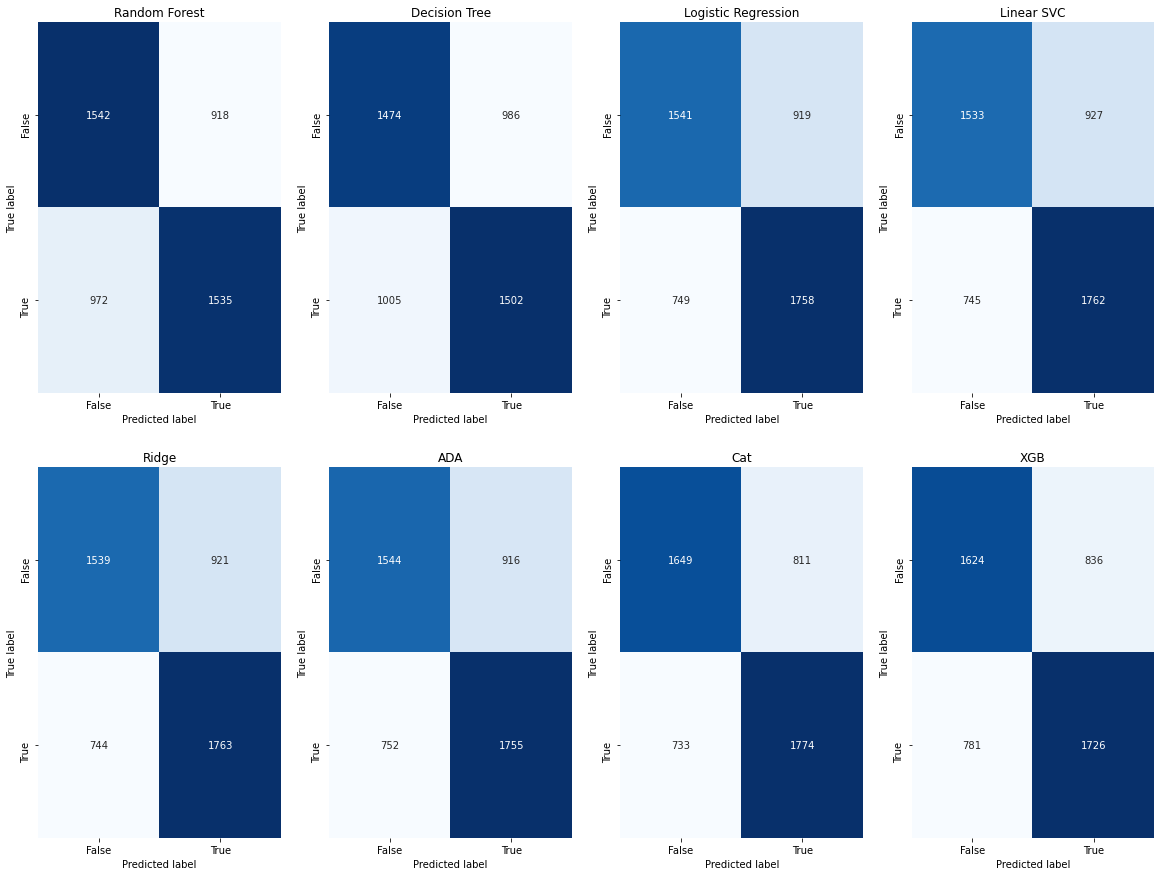

F1 score on training set
Random Forest   0.6195574343058947
Decision Tree   0.5991547244949912
Logistic Regression   0.6638296509610488
Linear SVC   0.6630014009553737
Ridge   0.6644203547141175
ADA   0.6638410823677443
Cat   0.6889719354911938
XGB   0.6743174396243364


In [22]:
X_train,X_test,y_train,y_test=train_test_split(features_new,target,test_size=0.2,random_state=42)
scores,names=classifiers(X_train,X_test,y_train,y_test)
print("F1 score on training set")
for (i, n) in zip(scores, names):
    print(n," ",i)

### Description

* Looking at the confusion matrix we can say CatBoost has minimum False Negatives = 733
* Highest F1 score obtained using CatBoost
* Lowest F1 score obtained using Decision Tree

* Grid search CV below used to find the optimal parameters for the models which have been implemented in the above function

# Grid Search CV

In [18]:
def model_tuning(X_train,X_test,y_train,y_test):
    
    params = {
                'n_estimators': [500],
                'max_depth': [1, 3, 5],
                'learning_rate': [0.1, 0.5, 0.7],
                'reg_alpha': [0.07, 0.09, 0.5],
                'reg_lambda': [0.07, 0.09, 0.5],
                'n_jobs': [-1]
            }
    grid = GridSearchCV(estimator=XGBClassifier(verbosity=0,use_label_encoder=False), param_grid=params, cv=3, verbose=3,scoring='roc_auc')
    grid.fit(X_train,y_train)
    print(grid.best_params_)

    params = {
                'penalty': ['l2', 'none'],
                'C': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 10, 100],
                'fit_intercept': [True, False],
                'n_jobs': [-1]
            }
    grid2 = GridSearchCV(estimator=LogisticRegression(), param_grid=params, cv=3, verbose=3,scoring='roc_auc')
    grid2.fit(X_train,y_train)
    print(grid2.best_params_)
    
    from catboost import CatBoostClassifier
    model = CatBoostClassifier(silent=True)
    params = {'learning_rate': [0.05,0.1,0.5],
            'depth': [3,6, 10],
            'l2_leaf_reg': [5, 7, 9]}

    grid3 = GridSearchCV(estimator=CatBoostClassifier(silent=True), param_grid=params, cv=3, verbose=3,scoring='roc_auc')
    grid3.fit(X_train,y_train)
    print(grid3.best_params_)
    
    print('Best parameters')
    print(grid.best_params_)
    print(grid2.best_params_)
    print(grid3.best_params_)
    return

In [32]:
model_tuning(X_train,X_test,y_train,y_test)

Fitting 3 folds for each of 81 candidates, totalling 243 fits
[CV] learning_rate=0.1, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=0.07, reg_lambda=0.07 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  learning_rate=0.1, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=0.07, reg_lambda=0.07, score=0.707, total=   1.1s
[CV] learning_rate=0.1, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=0.07, reg_lambda=0.07 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s


[CV]  learning_rate=0.1, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=0.07, reg_lambda=0.07, score=0.710, total=   1.1s
[CV] learning_rate=0.1, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=0.07, reg_lambda=0.07 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.1s remaining:    0.0s


[CV]  learning_rate=0.1, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=0.07, reg_lambda=0.07, score=0.719, total=   1.1s
[CV] learning_rate=0.1, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=0.07, reg_lambda=0.09 
[CV]  learning_rate=0.1, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=0.07, reg_lambda=0.09, score=0.707, total=   1.1s
[CV] learning_rate=0.1, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=0.07, reg_lambda=0.09 
[CV]  learning_rate=0.1, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=0.07, reg_lambda=0.09, score=0.710, total=   1.1s
[CV] learning_rate=0.1, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=0.07, reg_lambda=0.09 
[CV]  learning_rate=0.1, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=0.07, reg_lambda=0.09, score=0.719, total=   1.1s
[CV] learning_rate=0.1, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=0.07, reg_lambda=0.5 
[CV]  learning_rate=0.1, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=0.07, reg_lambda=0.5

[CV]  learning_rate=0.1, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.09, score=0.719, total=   2.3s
[CV] learning_rate=0.1, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.09 
[CV]  learning_rate=0.1, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.09, score=0.714, total=   2.3s
[CV] learning_rate=0.1, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.09 
[CV]  learning_rate=0.1, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.09, score=0.724, total=   2.3s
[CV] learning_rate=0.1, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.5 
[CV]  learning_rate=0.1, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.5, score=0.719, total=   2.3s
[CV] learning_rate=0.1, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.5 
[CV]  learning_rate=0.1, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.5, 

[CV]  learning_rate=0.1, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=0.5, reg_lambda=0.09, score=0.700, total=   4.2s
[CV] learning_rate=0.1, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=0.5, reg_lambda=0.09 
[CV]  learning_rate=0.1, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=0.5, reg_lambda=0.09, score=0.711, total=   3.4s
[CV] learning_rate=0.1, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=0.5, reg_lambda=0.5 
[CV]  learning_rate=0.1, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=0.5, reg_lambda=0.5, score=0.709, total=   3.5s
[CV] learning_rate=0.1, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=0.5, reg_lambda=0.5 
[CV]  learning_rate=0.1, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=0.5, reg_lambda=0.5, score=0.702, total=   4.9s
[CV] learning_rate=0.1, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=0.5, reg_lambda=0.5 
[CV]  learning_rate=0.1, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=0.5, reg_lambda=0.5, score=0.712

[CV]  learning_rate=0.5, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=0.07, reg_lambda=0.09, score=0.686, total=   2.8s
[CV] learning_rate=0.5, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=0.07, reg_lambda=0.5 
[CV]  learning_rate=0.5, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=0.07, reg_lambda=0.5, score=0.691, total=   2.9s
[CV] learning_rate=0.5, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=0.07, reg_lambda=0.5 
[CV]  learning_rate=0.5, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=0.07, reg_lambda=0.5, score=0.685, total=   2.8s
[CV] learning_rate=0.5, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=0.07, reg_lambda=0.5 
[CV]  learning_rate=0.5, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=0.07, reg_lambda=0.5, score=0.693, total=   2.9s
[CV] learning_rate=0.5, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.07 
[CV]  learning_rate=0.5, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.07, sc

[CV]  learning_rate=0.5, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.5, score=0.665, total=   4.2s
[CV] learning_rate=0.5, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.5 
[CV]  learning_rate=0.5, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.5, score=0.664, total=   4.1s
[CV] learning_rate=0.5, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.5 
[CV]  learning_rate=0.5, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.5, score=0.668, total=   4.2s
[CV] learning_rate=0.5, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=0.5, reg_lambda=0.07 
[CV]  learning_rate=0.5, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=0.5, reg_lambda=0.07, score=0.660, total=   4.1s
[CV] learning_rate=0.5, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=0.5, reg_lambda=0.07 
[CV]  learning_rate=0.5, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=0.5, reg_lambda=0.07, score

[CV]  learning_rate=0.7, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=0.5, reg_lambda=0.5, score=0.711, total=   1.0s
[CV] learning_rate=0.7, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=0.5, reg_lambda=0.5 
[CV]  learning_rate=0.7, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=0.5, reg_lambda=0.5, score=0.718, total=   1.0s
[CV] learning_rate=0.7, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=0.07, reg_lambda=0.07 
[CV]  learning_rate=0.7, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=0.07, reg_lambda=0.07, score=0.672, total=   2.2s
[CV] learning_rate=0.7, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=0.07, reg_lambda=0.07 
[CV]  learning_rate=0.7, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=0.07, reg_lambda=0.07, score=0.669, total=   2.2s
[CV] learning_rate=0.7, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=0.07, reg_lambda=0.07 
[CV]  learning_rate=0.7, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=0.07, reg_lambda=0.07, sc

[CV]  learning_rate=0.7, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=0.07, reg_lambda=0.5, score=0.658, total=   3.9s
[CV] learning_rate=0.7, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.07 
[CV]  learning_rate=0.7, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.07, score=0.655, total=   4.3s
[CV] learning_rate=0.7, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.07 
[CV]  learning_rate=0.7, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.07, score=0.653, total=   4.1s
[CV] learning_rate=0.7, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.07 
[CV]  learning_rate=0.7, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.07, score=0.651, total=   3.8s
[CV] learning_rate=0.7, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.09 
[CV]  learning_rate=0.7, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.0

[Parallel(n_jobs=1)]: Done 243 out of 243 | elapsed: 10.2min finished


{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500, 'n_jobs': -1, 'reg_alpha': 0.5, 'reg_lambda': 0.09}
Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV] C=0.001, fit_intercept=True, n_jobs=-1, penalty=l2 ..............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  C=0.001, fit_intercept=True, n_jobs=-1, penalty=l2, score=0.677, total=   2.9s
[CV] C=0.001, fit_intercept=True, n_jobs=-1, penalty=l2 ..............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.8s remaining:    0.0s


[CV]  C=0.001, fit_intercept=True, n_jobs=-1, penalty=l2, score=0.678, total=   1.5s
[CV] C=0.001, fit_intercept=True, n_jobs=-1, penalty=l2 ..............


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.3s remaining:    0.0s


[CV]  C=0.001, fit_intercept=True, n_jobs=-1, penalty=l2, score=0.695, total=   1.6s
[CV] C=0.001, fit_intercept=True, n_jobs=-1, penalty=none ............


C:\Users\shlok\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.001, fit_intercept=True, n_jobs=-1, penalty=none, score=0.708, total=   1.9s
[CV] C=0.001, fit_intercept=True, n_jobs=-1, penalty=none ............


C:\Users\shlok\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.001, fit_intercept=True, n_jobs=-1, penalty=none, score=0.708, total=   1.7s
[CV] C=0.001, fit_intercept=True, n_jobs=-1, penalty=none ............


C:\Users\shlok\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.001, fit_intercept=True, n_jobs=-1, penalty=none, score=0.719, total=   1.8s
[CV] C=0.001, fit_intercept=False, n_jobs=-1, penalty=l2 .............
[CV]  C=0.001, fit_intercept=False, n_jobs=-1, penalty=l2, score=0.677, total=   1.3s
[CV] C=0.001, fit_intercept=False, n_jobs=-1, penalty=l2 .............
[CV]  C=0.001, fit_intercept=False, n_jobs=-1, penalty=l2, score=0.678, total=   1.4s
[CV] C=0.001, fit_intercept=False, n_jobs=-1, penalty=l2 .............
[CV]  C=0.001, fit_intercept=False, n_jobs=-1, penalty=l2, score=0.695, total=   0.6s
[CV] C=0.001, fit_intercept=False, n_jobs=-1, penalty=none ...........


C:\Users\shlok\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.001, fit_intercept=False, n_jobs=-1, penalty=none, score=0.708, total=   0.9s
[CV] C=0.001, fit_intercept=False, n_jobs=-1, penalty=none ...........


C:\Users\shlok\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.001, fit_intercept=False, n_jobs=-1, penalty=none, score=0.709, total=   1.0s
[CV] C=0.001, fit_intercept=False, n_jobs=-1, penalty=none ...........


C:\Users\shlok\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.001, fit_intercept=False, n_jobs=-1, penalty=none, score=0.719, total=   0.9s
[CV] C=0.005, fit_intercept=True, n_jobs=-1, penalty=l2 ..............
[CV]  C=0.005, fit_intercept=True, n_jobs=-1, penalty=l2, score=0.686, total=   0.6s
[CV] C=0.005, fit_intercept=True, n_jobs=-1, penalty=l2 ..............
[CV]  C=0.005, fit_intercept=True, n_jobs=-1, penalty=l2, score=0.687, total=   0.6s
[CV] C=0.005, fit_intercept=True, n_jobs=-1, penalty=l2 ..............
[CV]  C=0.005, fit_intercept=True, n_jobs=-1, penalty=l2, score=0.704, total=   0.7s
[CV] C=0.005, fit_intercept=True, n_jobs=-1, penalty=none ............


C:\Users\shlok\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.005, fit_intercept=True, n_jobs=-1, penalty=none, score=0.708, total=   1.0s
[CV] C=0.005, fit_intercept=True, n_jobs=-1, penalty=none ............


C:\Users\shlok\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.005, fit_intercept=True, n_jobs=-1, penalty=none, score=0.708, total=   1.0s
[CV] C=0.005, fit_intercept=True, n_jobs=-1, penalty=none ............


C:\Users\shlok\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.005, fit_intercept=True, n_jobs=-1, penalty=none, score=0.719, total=   1.0s
[CV] C=0.005, fit_intercept=False, n_jobs=-1, penalty=l2 .............
[CV]  C=0.005, fit_intercept=False, n_jobs=-1, penalty=l2, score=0.686, total=   0.6s
[CV] C=0.005, fit_intercept=False, n_jobs=-1, penalty=l2 .............
[CV]  C=0.005, fit_intercept=False, n_jobs=-1, penalty=l2, score=0.687, total=   0.6s
[CV] C=0.005, fit_intercept=False, n_jobs=-1, penalty=l2 .............
[CV]  C=0.005, fit_intercept=False, n_jobs=-1, penalty=l2, score=0.704, total=   0.6s
[CV] C=0.005, fit_intercept=False, n_jobs=-1, penalty=none ...........


C:\Users\shlok\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.005, fit_intercept=False, n_jobs=-1, penalty=none, score=0.708, total=   0.9s
[CV] C=0.005, fit_intercept=False, n_jobs=-1, penalty=none ...........


C:\Users\shlok\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.005, fit_intercept=False, n_jobs=-1, penalty=none, score=0.709, total=   0.9s
[CV] C=0.005, fit_intercept=False, n_jobs=-1, penalty=none ...........


C:\Users\shlok\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.005, fit_intercept=False, n_jobs=-1, penalty=none, score=0.719, total=   0.9s
[CV] C=0.01, fit_intercept=True, n_jobs=-1, penalty=l2 ...............
[CV]  C=0.01, fit_intercept=True, n_jobs=-1, penalty=l2, score=0.692, total=   0.6s
[CV] C=0.01, fit_intercept=True, n_jobs=-1, penalty=l2 ...............
[CV]  C=0.01, fit_intercept=True, n_jobs=-1, penalty=l2, score=0.693, total=   0.6s
[CV] C=0.01, fit_intercept=True, n_jobs=-1, penalty=l2 ...............
[CV]  C=0.01, fit_intercept=True, n_jobs=-1, penalty=l2, score=0.710, total=   0.7s
[CV] C=0.01, fit_intercept=True, n_jobs=-1, penalty=none .............


C:\Users\shlok\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.01, fit_intercept=True, n_jobs=-1, penalty=none, score=0.708, total=   1.0s
[CV] C=0.01, fit_intercept=True, n_jobs=-1, penalty=none .............


C:\Users\shlok\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.01, fit_intercept=True, n_jobs=-1, penalty=none, score=0.708, total=   1.0s
[CV] C=0.01, fit_intercept=True, n_jobs=-1, penalty=none .............


C:\Users\shlok\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.01, fit_intercept=True, n_jobs=-1, penalty=none, score=0.719, total=   1.0s
[CV] C=0.01, fit_intercept=False, n_jobs=-1, penalty=l2 ..............
[CV]  C=0.01, fit_intercept=False, n_jobs=-1, penalty=l2, score=0.691, total=   0.7s
[CV] C=0.01, fit_intercept=False, n_jobs=-1, penalty=l2 ..............
[CV]  C=0.01, fit_intercept=False, n_jobs=-1, penalty=l2, score=0.693, total=   0.6s
[CV] C=0.01, fit_intercept=False, n_jobs=-1, penalty=l2 ..............
[CV]  C=0.01, fit_intercept=False, n_jobs=-1, penalty=l2, score=0.710, total=   0.7s
[CV] C=0.01, fit_intercept=False, n_jobs=-1, penalty=none ............


C:\Users\shlok\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.01, fit_intercept=False, n_jobs=-1, penalty=none, score=0.708, total=   0.9s
[CV] C=0.01, fit_intercept=False, n_jobs=-1, penalty=none ............


C:\Users\shlok\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.01, fit_intercept=False, n_jobs=-1, penalty=none, score=0.709, total=   1.0s
[CV] C=0.01, fit_intercept=False, n_jobs=-1, penalty=none ............


C:\Users\shlok\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.01, fit_intercept=False, n_jobs=-1, penalty=none, score=0.719, total=   0.9s
[CV] C=0.05, fit_intercept=True, n_jobs=-1, penalty=l2 ...............
[CV]  C=0.05, fit_intercept=True, n_jobs=-1, penalty=l2, score=0.703, total=   0.8s
[CV] C=0.05, fit_intercept=True, n_jobs=-1, penalty=l2 ...............
[CV]  C=0.05, fit_intercept=True, n_jobs=-1, penalty=l2, score=0.703, total=   0.8s
[CV] C=0.05, fit_intercept=True, n_jobs=-1, penalty=l2 ...............
[CV]  C=0.05, fit_intercept=True, n_jobs=-1, penalty=l2, score=0.718, total=   0.7s
[CV] C=0.05, fit_intercept=True, n_jobs=-1, penalty=none .............


C:\Users\shlok\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.05, fit_intercept=True, n_jobs=-1, penalty=none, score=0.708, total=   0.9s
[CV] C=0.05, fit_intercept=True, n_jobs=-1, penalty=none .............


C:\Users\shlok\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.05, fit_intercept=True, n_jobs=-1, penalty=none, score=0.708, total=   1.0s
[CV] C=0.05, fit_intercept=True, n_jobs=-1, penalty=none .............


C:\Users\shlok\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.05, fit_intercept=True, n_jobs=-1, penalty=none, score=0.719, total=   1.0s
[CV] C=0.05, fit_intercept=False, n_jobs=-1, penalty=l2 ..............
[CV]  C=0.05, fit_intercept=False, n_jobs=-1, penalty=l2, score=0.702, total=   0.7s
[CV] C=0.05, fit_intercept=False, n_jobs=-1, penalty=l2 ..............
[CV]  C=0.05, fit_intercept=False, n_jobs=-1, penalty=l2, score=0.703, total=   0.7s
[CV] C=0.05, fit_intercept=False, n_jobs=-1, penalty=l2 ..............
[CV]  C=0.05, fit_intercept=False, n_jobs=-1, penalty=l2, score=0.717, total=   0.7s
[CV] C=0.05, fit_intercept=False, n_jobs=-1, penalty=none ............


C:\Users\shlok\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.05, fit_intercept=False, n_jobs=-1, penalty=none, score=0.708, total=   0.9s
[CV] C=0.05, fit_intercept=False, n_jobs=-1, penalty=none ............


C:\Users\shlok\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.05, fit_intercept=False, n_jobs=-1, penalty=none, score=0.709, total=   1.1s
[CV] C=0.05, fit_intercept=False, n_jobs=-1, penalty=none ............


C:\Users\shlok\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.05, fit_intercept=False, n_jobs=-1, penalty=none, score=0.719, total=   0.9s
[CV] C=0.1, fit_intercept=True, n_jobs=-1, penalty=l2 ................
[CV]  C=0.1, fit_intercept=True, n_jobs=-1, penalty=l2, score=0.706, total=   0.8s
[CV] C=0.1, fit_intercept=True, n_jobs=-1, penalty=l2 ................
[CV]  C=0.1, fit_intercept=True, n_jobs=-1, penalty=l2, score=0.705, total=   0.8s
[CV] C=0.1, fit_intercept=True, n_jobs=-1, penalty=l2 ................
[CV]  C=0.1, fit_intercept=True, n_jobs=-1, penalty=l2, score=0.719, total=   0.8s
[CV] C=0.1, fit_intercept=True, n_jobs=-1, penalty=none ..............


C:\Users\shlok\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.1, fit_intercept=True, n_jobs=-1, penalty=none, score=0.708, total=   1.0s
[CV] C=0.1, fit_intercept=True, n_jobs=-1, penalty=none ..............


C:\Users\shlok\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.1, fit_intercept=True, n_jobs=-1, penalty=none, score=0.708, total=   1.0s
[CV] C=0.1, fit_intercept=True, n_jobs=-1, penalty=none ..............


C:\Users\shlok\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.1, fit_intercept=True, n_jobs=-1, penalty=none, score=0.719, total=   1.0s
[CV] C=0.1, fit_intercept=False, n_jobs=-1, penalty=l2 ...............
[CV]  C=0.1, fit_intercept=False, n_jobs=-1, penalty=l2, score=0.705, total=   0.8s
[CV] C=0.1, fit_intercept=False, n_jobs=-1, penalty=l2 ...............
[CV]  C=0.1, fit_intercept=False, n_jobs=-1, penalty=l2, score=0.705, total=   0.8s
[CV] C=0.1, fit_intercept=False, n_jobs=-1, penalty=l2 ...............
[CV]  C=0.1, fit_intercept=False, n_jobs=-1, penalty=l2, score=0.718, total=   0.8s
[CV] C=0.1, fit_intercept=False, n_jobs=-1, penalty=none .............


C:\Users\shlok\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.1, fit_intercept=False, n_jobs=-1, penalty=none, score=0.708, total=   0.9s
[CV] C=0.1, fit_intercept=False, n_jobs=-1, penalty=none .............


C:\Users\shlok\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.1, fit_intercept=False, n_jobs=-1, penalty=none, score=0.709, total=   1.0s
[CV] C=0.1, fit_intercept=False, n_jobs=-1, penalty=none .............


C:\Users\shlok\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.1, fit_intercept=False, n_jobs=-1, penalty=none, score=0.719, total=   0.9s
[CV] C=0.5, fit_intercept=True, n_jobs=-1, penalty=l2 ................
[CV]  C=0.5, fit_intercept=True, n_jobs=-1, penalty=l2, score=0.708, total=   0.9s
[CV] C=0.5, fit_intercept=True, n_jobs=-1, penalty=l2 ................
[CV]  C=0.5, fit_intercept=True, n_jobs=-1, penalty=l2, score=0.708, total=   0.9s
[CV] C=0.5, fit_intercept=True, n_jobs=-1, penalty=l2 ................
[CV]  C=0.5, fit_intercept=True, n_jobs=-1, penalty=l2, score=0.719, total=   0.9s
[CV] C=0.5, fit_intercept=True, n_jobs=-1, penalty=none ..............


C:\Users\shlok\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.5, fit_intercept=True, n_jobs=-1, penalty=none, score=0.708, total=   1.0s
[CV] C=0.5, fit_intercept=True, n_jobs=-1, penalty=none ..............


C:\Users\shlok\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.5, fit_intercept=True, n_jobs=-1, penalty=none, score=0.708, total=   1.0s
[CV] C=0.5, fit_intercept=True, n_jobs=-1, penalty=none ..............


C:\Users\shlok\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.5, fit_intercept=True, n_jobs=-1, penalty=none, score=0.719, total=   1.0s
[CV] C=0.5, fit_intercept=False, n_jobs=-1, penalty=l2 ...............
[CV]  C=0.5, fit_intercept=False, n_jobs=-1, penalty=l2, score=0.708, total=   0.8s
[CV] C=0.5, fit_intercept=False, n_jobs=-1, penalty=l2 ...............
[CV]  C=0.5, fit_intercept=False, n_jobs=-1, penalty=l2, score=0.708, total=   0.8s
[CV] C=0.5, fit_intercept=False, n_jobs=-1, penalty=l2 ...............
[CV]  C=0.5, fit_intercept=False, n_jobs=-1, penalty=l2, score=0.719, total=   0.8s
[CV] C=0.5, fit_intercept=False, n_jobs=-1, penalty=none .............


C:\Users\shlok\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.5, fit_intercept=False, n_jobs=-1, penalty=none, score=0.708, total=   0.9s
[CV] C=0.5, fit_intercept=False, n_jobs=-1, penalty=none .............


C:\Users\shlok\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.5, fit_intercept=False, n_jobs=-1, penalty=none, score=0.709, total=   1.0s
[CV] C=0.5, fit_intercept=False, n_jobs=-1, penalty=none .............


C:\Users\shlok\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.5, fit_intercept=False, n_jobs=-1, penalty=none, score=0.719, total=   0.9s
[CV] C=1, fit_intercept=True, n_jobs=-1, penalty=l2 ..................
[CV]  C=1, fit_intercept=True, n_jobs=-1, penalty=l2, score=0.708, total=   0.9s
[CV] C=1, fit_intercept=True, n_jobs=-1, penalty=l2 ..................
[CV]  C=1, fit_intercept=True, n_jobs=-1, penalty=l2, score=0.708, total=   0.9s
[CV] C=1, fit_intercept=True, n_jobs=-1, penalty=l2 ..................
[CV]  C=1, fit_intercept=True, n_jobs=-1, penalty=l2, score=0.719, total=   1.0s
[CV] C=1, fit_intercept=True, n_jobs=-1, penalty=none ................
[CV]  C=1, fit_intercept=True, n_jobs=-1, penalty=none, score=0.708, total=   1.0s
[CV] C=1, fit_intercept=True, n_jobs=-1, penalty=none ................
[CV]  C=1, fit_intercept=True, n_jobs=-1, penalty=none, score=0.708, total=   1.0s
[CV] C=1, fit_intercept=True, n_jobs=-1, penalty=none ................
[CV]  C=1, fit_intercept=True, n_jobs=-1, penalty=none, score=0.719, total=   1

C:\Users\shlok\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=10, fit_intercept=True, n_jobs=-1, penalty=none, score=0.708, total=   1.0s
[CV] C=10, fit_intercept=True, n_jobs=-1, penalty=none ...............


C:\Users\shlok\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=10, fit_intercept=True, n_jobs=-1, penalty=none, score=0.708, total=   1.0s
[CV] C=10, fit_intercept=True, n_jobs=-1, penalty=none ...............


C:\Users\shlok\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=10, fit_intercept=True, n_jobs=-1, penalty=none, score=0.719, total=   1.0s
[CV] C=10, fit_intercept=False, n_jobs=-1, penalty=l2 ................
[CV]  C=10, fit_intercept=False, n_jobs=-1, penalty=l2, score=0.708, total=   1.0s
[CV] C=10, fit_intercept=False, n_jobs=-1, penalty=l2 ................
[CV]  C=10, fit_intercept=False, n_jobs=-1, penalty=l2, score=0.709, total=   1.0s
[CV] C=10, fit_intercept=False, n_jobs=-1, penalty=l2 ................
[CV]  C=10, fit_intercept=False, n_jobs=-1, penalty=l2, score=0.719, total=   1.0s
[CV] C=10, fit_intercept=False, n_jobs=-1, penalty=none ..............


C:\Users\shlok\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=10, fit_intercept=False, n_jobs=-1, penalty=none, score=0.708, total=   0.9s
[CV] C=10, fit_intercept=False, n_jobs=-1, penalty=none ..............


C:\Users\shlok\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=10, fit_intercept=False, n_jobs=-1, penalty=none, score=0.709, total=   1.0s
[CV] C=10, fit_intercept=False, n_jobs=-1, penalty=none ..............


C:\Users\shlok\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=10, fit_intercept=False, n_jobs=-1, penalty=none, score=0.719, total=   0.9s
[CV] C=100, fit_intercept=True, n_jobs=-1, penalty=l2 ................
[CV]  C=100, fit_intercept=True, n_jobs=-1, penalty=l2, score=0.708, total=   1.0s
[CV] C=100, fit_intercept=True, n_jobs=-1, penalty=l2 ................
[CV]  C=100, fit_intercept=True, n_jobs=-1, penalty=l2, score=0.708, total=   1.1s
[CV] C=100, fit_intercept=True, n_jobs=-1, penalty=l2 ................
[CV]  C=100, fit_intercept=True, n_jobs=-1, penalty=l2, score=0.719, total=   1.0s
[CV] C=100, fit_intercept=True, n_jobs=-1, penalty=none ..............


C:\Users\shlok\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=100, fit_intercept=True, n_jobs=-1, penalty=none, score=0.708, total=   0.9s
[CV] C=100, fit_intercept=True, n_jobs=-1, penalty=none ..............


C:\Users\shlok\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=100, fit_intercept=True, n_jobs=-1, penalty=none, score=0.708, total=   1.1s
[CV] C=100, fit_intercept=True, n_jobs=-1, penalty=none ..............


C:\Users\shlok\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=100, fit_intercept=True, n_jobs=-1, penalty=none, score=0.719, total=   1.0s
[CV] C=100, fit_intercept=False, n_jobs=-1, penalty=l2 ...............
[CV]  C=100, fit_intercept=False, n_jobs=-1, penalty=l2, score=0.708, total=   1.0s
[CV] C=100, fit_intercept=False, n_jobs=-1, penalty=l2 ...............
[CV]  C=100, fit_intercept=False, n_jobs=-1, penalty=l2, score=0.709, total=   1.1s
[CV] C=100, fit_intercept=False, n_jobs=-1, penalty=l2 ...............
[CV]  C=100, fit_intercept=False, n_jobs=-1, penalty=l2, score=0.719, total=   1.1s
[CV] C=100, fit_intercept=False, n_jobs=-1, penalty=none .............


C:\Users\shlok\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=100, fit_intercept=False, n_jobs=-1, penalty=none, score=0.708, total=   1.0s
[CV] C=100, fit_intercept=False, n_jobs=-1, penalty=none .............


C:\Users\shlok\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=100, fit_intercept=False, n_jobs=-1, penalty=none, score=0.709, total=   1.1s
[CV] C=100, fit_intercept=False, n_jobs=-1, penalty=none .............


C:\Users\shlok\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=100, fit_intercept=False, n_jobs=-1, penalty=none, score=0.719, total=   1.0s


[Parallel(n_jobs=1)]: Done 108 out of 108 | elapsed:  1.7min finished
C:\Users\shlok\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


{'C': 0.001, 'fit_intercept': False, 'n_jobs': -1, 'penalty': 'none'}
Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV] depth=3, l2_leaf_reg=5, learning_rate=0.05 ......................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  depth=3, l2_leaf_reg=5, learning_rate=0.05, score=0.722, total=   5.3s
[CV] depth=3, l2_leaf_reg=5, learning_rate=0.05 ......................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.2s remaining:    0.0s


[CV]  depth=3, l2_leaf_reg=5, learning_rate=0.05, score=0.720, total=   5.4s
[CV] depth=3, l2_leaf_reg=5, learning_rate=0.05 ......................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   10.6s remaining:    0.0s


[CV]  depth=3, l2_leaf_reg=5, learning_rate=0.05, score=0.733, total=   5.0s
[CV] depth=3, l2_leaf_reg=5, learning_rate=0.1 .......................
[CV]  depth=3, l2_leaf_reg=5, learning_rate=0.1, score=0.721, total=   5.0s
[CV] depth=3, l2_leaf_reg=5, learning_rate=0.1 .......................
[CV]  depth=3, l2_leaf_reg=5, learning_rate=0.1, score=0.717, total=   5.2s
[CV] depth=3, l2_leaf_reg=5, learning_rate=0.1 .......................
[CV]  depth=3, l2_leaf_reg=5, learning_rate=0.1, score=0.729, total=   5.2s
[CV] depth=3, l2_leaf_reg=5, learning_rate=0.5 .......................
[CV]  depth=3, l2_leaf_reg=5, learning_rate=0.5, score=0.706, total=   5.1s
[CV] depth=3, l2_leaf_reg=5, learning_rate=0.5 .......................
[CV]  depth=3, l2_leaf_reg=5, learning_rate=0.5, score=0.698, total=   5.1s
[CV] depth=3, l2_leaf_reg=5, learning_rate=0.5 .......................
[CV]  depth=3, l2_leaf_reg=5, learning_rate=0.5, score=nan, total=   0.0s
[CV] depth=3, l2_leaf_reg=7, learning_rate=

C:\Users\shlok\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\shlok\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\shlok\anaconda3\lib\site-packages\catboost\core.py", line 4675, in fit
    self._fit(X, y, cat_features, text_features, embedding_features, None, sample_weight, None, None, None, None, baseline, use_best_model,
  File "C:\Users\shlok\anaconda3\lib\site-packages\catboost\core.py", line 1997, in _fit
    self._train(
  File "C:\Users\shlok\anaconda3\lib\site-packages\catboost\core.py", line 1428, in _train
    self._object._train(train_pool, test_pool, params, allow_clear_pool, init_model._object if init_model else None)
  File "_catboost.pyx", line 4348, i

[CV]  depth=3, l2_leaf_reg=7, learning_rate=0.05, score=0.722, total=   5.2s
[CV] depth=3, l2_leaf_reg=7, learning_rate=0.05 ......................
[CV]  depth=3, l2_leaf_reg=7, learning_rate=0.05, score=0.720, total=   5.2s
[CV] depth=3, l2_leaf_reg=7, learning_rate=0.05 ......................
[CV]  depth=3, l2_leaf_reg=7, learning_rate=0.05, score=0.732, total=   5.6s
[CV] depth=3, l2_leaf_reg=7, learning_rate=0.1 .......................
[CV]  depth=3, l2_leaf_reg=7, learning_rate=0.1, score=0.721, total=   5.3s
[CV] depth=3, l2_leaf_reg=7, learning_rate=0.1 .......................
[CV]  depth=3, l2_leaf_reg=7, learning_rate=0.1, score=0.717, total=   5.1s
[CV] depth=3, l2_leaf_reg=7, learning_rate=0.1 .......................
[CV]  depth=3, l2_leaf_reg=7, learning_rate=0.1, score=0.730, total=   5.3s
[CV] depth=3, l2_leaf_reg=7, learning_rate=0.5 .......................
[CV]  depth=3, l2_leaf_reg=7, learning_rate=0.5, score=0.710, total=   5.3s
[CV] depth=3, l2_leaf_reg=7, learning_r

C:\Users\shlok\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\shlok\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\shlok\anaconda3\lib\site-packages\catboost\core.py", line 4675, in fit
    self._fit(X, y, cat_features, text_features, embedding_features, None, sample_weight, None, None, None, None, baseline, use_best_model,
  File "C:\Users\shlok\anaconda3\lib\site-packages\catboost\core.py", line 1997, in _fit
    self._train(
  File "C:\Users\shlok\anaconda3\lib\site-packages\catboost\core.py", line 1428, in _train
    self._object._train(train_pool, test_pool, params, allow_clear_pool, init_model._object if init_model else None)
  File "_catboost.pyx", line 4348, i

[CV]  depth=6, l2_leaf_reg=9, learning_rate=0.1, score=0.708, total=   9.3s
[CV] depth=6, l2_leaf_reg=9, learning_rate=0.1 .......................
[CV]  depth=6, l2_leaf_reg=9, learning_rate=0.1, score=0.700, total=   9.1s
[CV] depth=6, l2_leaf_reg=9, learning_rate=0.1 .......................
[CV]  depth=6, l2_leaf_reg=9, learning_rate=0.1, score=0.712, total=   9.4s
[CV] depth=6, l2_leaf_reg=9, learning_rate=0.5 .......................
[CV]  depth=6, l2_leaf_reg=9, learning_rate=0.5, score=0.677, total=   8.7s
[CV] depth=6, l2_leaf_reg=9, learning_rate=0.5 .......................
[CV]  depth=6, l2_leaf_reg=9, learning_rate=0.5, score=0.665, total=   8.7s
[CV] depth=6, l2_leaf_reg=9, learning_rate=0.5 .......................
[CV]  depth=6, l2_leaf_reg=9, learning_rate=0.5, score=0.672, total=   9.9s
[CV] depth=10, l2_leaf_reg=5, learning_rate=0.05 .....................
[CV]  depth=10, l2_leaf_reg=5, learning_rate=0.05, score=0.701, total=  35.6s
[CV] depth=10, l2_leaf_reg=5, learning_r

[Parallel(n_jobs=1)]: Done  81 out of  81 | elapsed: 21.4min finished


{'depth': 3, 'l2_leaf_reg': 5, 'learning_rate': 0.05}
Best parameters
{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500, 'n_jobs': -1, 'reg_alpha': 0.5, 'reg_lambda': 0.09}
{'C': 0.001, 'fit_intercept': False, 'n_jobs': -1, 'penalty': 'none'}
{'depth': 3, 'l2_leaf_reg': 5, 'learning_rate': 0.05}


# Method 2 (Using less no. of features with simpler models)

In [15]:
correlation_matrix = features_df.corr().round(2)
correlation_matrix=correlation_matrix.reset_index()
final_features=correlation_matrix[abs(correlation_matrix['isFraud'])>=0.04]['index']
final_features=final_features[:-1]
final_features.drop
target=features_df['isFraud']
features_new=features_df[final_features]

C:\Users\shlok\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


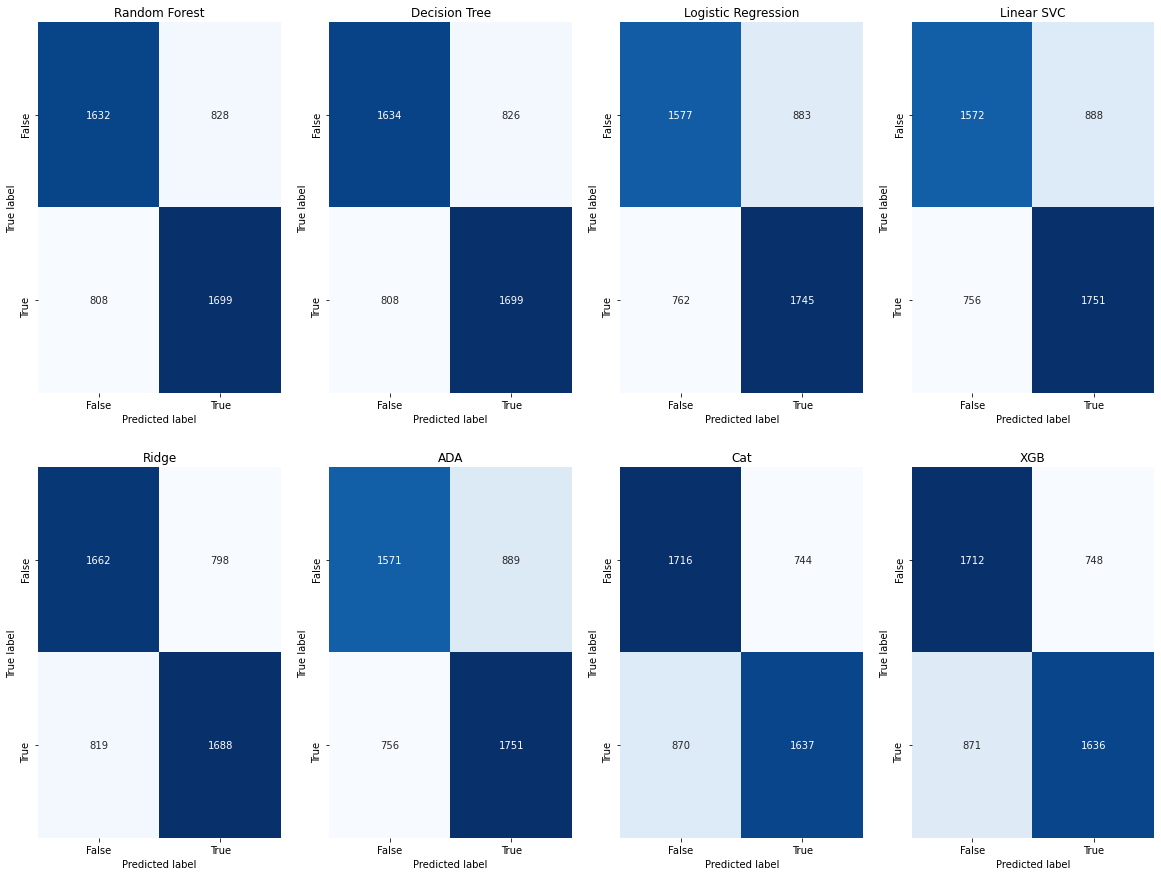

F1 score on training set
Random Forest   0.6705585336667088
Decision Tree   0.6709650377317495
Logistic Regression   0.6685539838046965
Linear SVC   0.668734373023826
Ridge   0.674462237442478
ADA   0.6685311209913056
Cat   0.675266327453861
XGB   0.6742538777601577


In [16]:
X_train,X_test,y_train,y_test=train_test_split(features_new,target,test_size=0.2,random_state=42)
scores,names=classifiers(X_train,X_test,y_train,y_test)
print("F1 score on training set")
for (i, n) in zip(scores, names):
    print(n," ",i)

### Description

* Highest F1 score obtained using CatBoost but is at par with simpler models like Decision Tree and Ridge Regression
* Lowest F1 score obtained using ADA Boost

In [19]:
model_tuning(X_train,X_test,y_train,y_test)

Fitting 3 folds for each of 81 candidates, totalling 243 fits
[CV] learning_rate=0.1, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=0.07, reg_lambda=0.07 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  learning_rate=0.1, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=0.07, reg_lambda=0.07, score=0.712, total=   0.7s
[CV] learning_rate=0.1, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=0.07, reg_lambda=0.07 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV]  learning_rate=0.1, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=0.07, reg_lambda=0.07, score=0.718, total=   0.7s
[CV] learning_rate=0.1, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=0.07, reg_lambda=0.07 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.3s remaining:    0.0s


[CV]  learning_rate=0.1, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=0.07, reg_lambda=0.07, score=0.719, total=   0.7s
[CV] learning_rate=0.1, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=0.07, reg_lambda=0.09 
[CV]  learning_rate=0.1, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=0.07, reg_lambda=0.09, score=0.712, total=   0.6s
[CV] learning_rate=0.1, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=0.07, reg_lambda=0.09 
[CV]  learning_rate=0.1, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=0.07, reg_lambda=0.09, score=0.718, total=   0.7s
[CV] learning_rate=0.1, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=0.07, reg_lambda=0.09 
[CV]  learning_rate=0.1, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=0.07, reg_lambda=0.09, score=0.719, total=   0.7s
[CV] learning_rate=0.1, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=0.07, reg_lambda=0.5 
[CV]  learning_rate=0.1, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=0.07, reg_lambda=0.5

[CV]  learning_rate=0.1, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.09, score=0.714, total=   1.1s
[CV] learning_rate=0.1, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.09 
[CV]  learning_rate=0.1, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.09, score=0.714, total=   1.1s
[CV] learning_rate=0.1, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.09 
[CV]  learning_rate=0.1, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.09, score=0.719, total=   1.1s
[CV] learning_rate=0.1, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.5 
[CV]  learning_rate=0.1, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.5, score=0.714, total=   1.1s
[CV] learning_rate=0.1, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.5 
[CV]  learning_rate=0.1, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.5, 

[CV]  learning_rate=0.1, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=0.5, reg_lambda=0.09, score=0.713, total=   2.8s
[CV] learning_rate=0.1, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=0.5, reg_lambda=0.09 
[CV]  learning_rate=0.1, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=0.5, reg_lambda=0.09, score=0.717, total=   1.3s
[CV] learning_rate=0.1, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=0.5, reg_lambda=0.5 
[CV]  learning_rate=0.1, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=0.5, reg_lambda=0.5, score=0.712, total=   1.6s
[CV] learning_rate=0.1, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=0.5, reg_lambda=0.5 
[CV]  learning_rate=0.1, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=0.5, reg_lambda=0.5, score=0.714, total=   1.6s
[CV] learning_rate=0.1, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=0.5, reg_lambda=0.5 
[CV]  learning_rate=0.1, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=0.5, reg_lambda=0.5, score=0.719

[CV]  learning_rate=0.5, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=0.07, reg_lambda=0.09, score=0.717, total=   1.1s
[CV] learning_rate=0.5, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=0.07, reg_lambda=0.5 
[CV]  learning_rate=0.5, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=0.07, reg_lambda=0.5, score=0.711, total=   1.1s
[CV] learning_rate=0.5, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=0.07, reg_lambda=0.5 
[CV]  learning_rate=0.5, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=0.07, reg_lambda=0.5, score=0.714, total=   1.1s
[CV] learning_rate=0.5, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=0.07, reg_lambda=0.5 
[CV]  learning_rate=0.5, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=0.07, reg_lambda=0.5, score=0.716, total=   1.1s
[CV] learning_rate=0.5, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.07 
[CV]  learning_rate=0.5, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.07, sc

[CV]  learning_rate=0.5, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.5, score=0.709, total=   2.5s
[CV] learning_rate=0.5, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.5 
[CV]  learning_rate=0.5, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.5, score=0.709, total=   2.4s
[CV] learning_rate=0.5, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.5 
[CV]  learning_rate=0.5, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.5, score=0.714, total=   2.5s
[CV] learning_rate=0.5, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=0.5, reg_lambda=0.07 
[CV]  learning_rate=0.5, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=0.5, reg_lambda=0.07, score=0.711, total=   2.2s
[CV] learning_rate=0.5, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=0.5, reg_lambda=0.07 
[CV]  learning_rate=0.5, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=0.5, reg_lambda=0.07, score

[CV]  learning_rate=0.7, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=0.5, reg_lambda=0.5, score=0.717, total=   1.4s
[CV] learning_rate=0.7, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=0.5, reg_lambda=0.5 
[CV]  learning_rate=0.7, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=0.5, reg_lambda=0.5, score=0.719, total=   1.4s
[CV] learning_rate=0.7, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=0.07, reg_lambda=0.07 
[CV]  learning_rate=0.7, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=0.07, reg_lambda=0.07, score=0.710, total=   1.2s
[CV] learning_rate=0.7, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=0.07, reg_lambda=0.07 
[CV]  learning_rate=0.7, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=0.07, reg_lambda=0.07, score=0.712, total=   1.2s
[CV] learning_rate=0.7, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=0.07, reg_lambda=0.07 
[CV]  learning_rate=0.7, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=0.07, reg_lambda=0.07, sc

[CV]  learning_rate=0.7, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=0.07, reg_lambda=0.5, score=0.714, total=   2.2s
[CV] learning_rate=0.7, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.07 
[CV]  learning_rate=0.7, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.07, score=0.709, total=   3.0s
[CV] learning_rate=0.7, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.07 
[CV]  learning_rate=0.7, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.07, score=0.709, total=   1.8s
[CV] learning_rate=0.7, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.07 
[CV]  learning_rate=0.7, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.07, score=0.714, total=   1.8s
[CV] learning_rate=0.7, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.09 
[CV]  learning_rate=0.7, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.0

[Parallel(n_jobs=1)]: Done 243 out of 243 | elapsed:  5.3min finished


{'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 500, 'n_jobs': -1, 'reg_alpha': 0.07, 'reg_lambda': 0.09}
Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV] C=0.001, fit_intercept=True, n_jobs=-1, penalty=l2 ..............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  C=0.001, fit_intercept=True, n_jobs=-1, penalty=l2, score=0.678, total=   1.9s
[CV] C=0.001, fit_intercept=True, n_jobs=-1, penalty=l2 ..............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s remaining:    0.0s


[CV]  C=0.001, fit_intercept=True, n_jobs=-1, penalty=l2, score=0.682, total=   1.5s
[CV] C=0.001, fit_intercept=True, n_jobs=-1, penalty=l2 ..............


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.3s remaining:    0.0s


[CV]  C=0.001, fit_intercept=True, n_jobs=-1, penalty=l2, score=0.691, total=   1.4s
[CV] C=0.001, fit_intercept=True, n_jobs=-1, penalty=none ............


C:\Users\shlok\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.001, fit_intercept=True, n_jobs=-1, penalty=none, score=0.711, total=   2.0s
[CV] C=0.001, fit_intercept=True, n_jobs=-1, penalty=none ............


C:\Users\shlok\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.001, fit_intercept=True, n_jobs=-1, penalty=none, score=0.717, total=   1.9s
[CV] C=0.001, fit_intercept=True, n_jobs=-1, penalty=none ............


C:\Users\shlok\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.001, fit_intercept=True, n_jobs=-1, penalty=none, score=0.719, total=   1.8s
[CV] C=0.001, fit_intercept=False, n_jobs=-1, penalty=l2 .............
[CV]  C=0.001, fit_intercept=False, n_jobs=-1, penalty=l2, score=0.678, total=   1.4s
[CV] C=0.001, fit_intercept=False, n_jobs=-1, penalty=l2 .............
[CV]  C=0.001, fit_intercept=False, n_jobs=-1, penalty=l2, score=0.682, total=   1.4s
[CV] C=0.001, fit_intercept=False, n_jobs=-1, penalty=l2 .............
[CV]  C=0.001, fit_intercept=False, n_jobs=-1, penalty=l2, score=0.690, total=   0.6s
[CV] C=0.001, fit_intercept=False, n_jobs=-1, penalty=none ...........


C:\Users\shlok\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.001, fit_intercept=False, n_jobs=-1, penalty=none, score=0.711, total=   0.9s
[CV] C=0.001, fit_intercept=False, n_jobs=-1, penalty=none ...........


C:\Users\shlok\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.001, fit_intercept=False, n_jobs=-1, penalty=none, score=0.717, total=   1.1s
[CV] C=0.001, fit_intercept=False, n_jobs=-1, penalty=none ...........


C:\Users\shlok\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.001, fit_intercept=False, n_jobs=-1, penalty=none, score=0.719, total=   0.9s
[CV] C=0.005, fit_intercept=True, n_jobs=-1, penalty=l2 ..............
[CV]  C=0.005, fit_intercept=True, n_jobs=-1, penalty=l2, score=0.688, total=   0.7s
[CV] C=0.005, fit_intercept=True, n_jobs=-1, penalty=l2 ..............
[CV]  C=0.005, fit_intercept=True, n_jobs=-1, penalty=l2, score=0.694, total=   0.6s
[CV] C=0.005, fit_intercept=True, n_jobs=-1, penalty=l2 ..............
[CV]  C=0.005, fit_intercept=True, n_jobs=-1, penalty=l2, score=0.701, total=   0.6s
[CV] C=0.005, fit_intercept=True, n_jobs=-1, penalty=none ............


C:\Users\shlok\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.005, fit_intercept=True, n_jobs=-1, penalty=none, score=0.711, total=   1.1s
[CV] C=0.005, fit_intercept=True, n_jobs=-1, penalty=none ............


C:\Users\shlok\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.005, fit_intercept=True, n_jobs=-1, penalty=none, score=0.717, total=   1.0s
[CV] C=0.005, fit_intercept=True, n_jobs=-1, penalty=none ............


C:\Users\shlok\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.005, fit_intercept=True, n_jobs=-1, penalty=none, score=0.719, total=   1.0s
[CV] C=0.005, fit_intercept=False, n_jobs=-1, penalty=l2 .............
[CV]  C=0.005, fit_intercept=False, n_jobs=-1, penalty=l2, score=0.687, total=   0.6s
[CV] C=0.005, fit_intercept=False, n_jobs=-1, penalty=l2 .............
[CV]  C=0.005, fit_intercept=False, n_jobs=-1, penalty=l2, score=0.693, total=   0.6s
[CV] C=0.005, fit_intercept=False, n_jobs=-1, penalty=l2 .............
[CV]  C=0.005, fit_intercept=False, n_jobs=-1, penalty=l2, score=0.700, total=   0.6s
[CV] C=0.005, fit_intercept=False, n_jobs=-1, penalty=none ...........


C:\Users\shlok\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.005, fit_intercept=False, n_jobs=-1, penalty=none, score=0.711, total=   0.9s
[CV] C=0.005, fit_intercept=False, n_jobs=-1, penalty=none ...........


C:\Users\shlok\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.005, fit_intercept=False, n_jobs=-1, penalty=none, score=0.717, total=   1.1s
[CV] C=0.005, fit_intercept=False, n_jobs=-1, penalty=none ...........


C:\Users\shlok\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.005, fit_intercept=False, n_jobs=-1, penalty=none, score=0.719, total=   0.9s
[CV] C=0.01, fit_intercept=True, n_jobs=-1, penalty=l2 ...............
[CV]  C=0.01, fit_intercept=True, n_jobs=-1, penalty=l2, score=0.695, total=   0.7s
[CV] C=0.01, fit_intercept=True, n_jobs=-1, penalty=l2 ...............
[CV]  C=0.01, fit_intercept=True, n_jobs=-1, penalty=l2, score=0.701, total=   0.7s
[CV] C=0.01, fit_intercept=True, n_jobs=-1, penalty=l2 ...............
[CV]  C=0.01, fit_intercept=True, n_jobs=-1, penalty=l2, score=0.708, total=   0.6s
[CV] C=0.01, fit_intercept=True, n_jobs=-1, penalty=none .............


C:\Users\shlok\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.01, fit_intercept=True, n_jobs=-1, penalty=none, score=0.711, total=   1.1s
[CV] C=0.01, fit_intercept=True, n_jobs=-1, penalty=none .............


C:\Users\shlok\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.01, fit_intercept=True, n_jobs=-1, penalty=none, score=0.717, total=   1.0s
[CV] C=0.01, fit_intercept=True, n_jobs=-1, penalty=none .............


C:\Users\shlok\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.01, fit_intercept=True, n_jobs=-1, penalty=none, score=0.719, total=   1.0s
[CV] C=0.01, fit_intercept=False, n_jobs=-1, penalty=l2 ..............
[CV]  C=0.01, fit_intercept=False, n_jobs=-1, penalty=l2, score=0.695, total=   0.6s
[CV] C=0.01, fit_intercept=False, n_jobs=-1, penalty=l2 ..............
[CV]  C=0.01, fit_intercept=False, n_jobs=-1, penalty=l2, score=0.701, total=   0.7s
[CV] C=0.01, fit_intercept=False, n_jobs=-1, penalty=l2 ..............
[CV]  C=0.01, fit_intercept=False, n_jobs=-1, penalty=l2, score=0.708, total=   0.6s
[CV] C=0.01, fit_intercept=False, n_jobs=-1, penalty=none ............


C:\Users\shlok\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.01, fit_intercept=False, n_jobs=-1, penalty=none, score=0.711, total=   0.9s
[CV] C=0.01, fit_intercept=False, n_jobs=-1, penalty=none ............


C:\Users\shlok\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.01, fit_intercept=False, n_jobs=-1, penalty=none, score=0.717, total=   1.1s
[CV] C=0.01, fit_intercept=False, n_jobs=-1, penalty=none ............


C:\Users\shlok\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.01, fit_intercept=False, n_jobs=-1, penalty=none, score=0.719, total=   0.9s
[CV] C=0.05, fit_intercept=True, n_jobs=-1, penalty=l2 ...............
[CV]  C=0.05, fit_intercept=True, n_jobs=-1, penalty=l2, score=0.705, total=   0.7s
[CV] C=0.05, fit_intercept=True, n_jobs=-1, penalty=l2 ...............
[CV]  C=0.05, fit_intercept=True, n_jobs=-1, penalty=l2, score=0.713, total=   0.7s
[CV] C=0.05, fit_intercept=True, n_jobs=-1, penalty=l2 ...............
[CV]  C=0.05, fit_intercept=True, n_jobs=-1, penalty=l2, score=0.716, total=   0.7s
[CV] C=0.05, fit_intercept=True, n_jobs=-1, penalty=none .............


C:\Users\shlok\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.05, fit_intercept=True, n_jobs=-1, penalty=none, score=0.711, total=   1.0s
[CV] C=0.05, fit_intercept=True, n_jobs=-1, penalty=none .............


C:\Users\shlok\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.05, fit_intercept=True, n_jobs=-1, penalty=none, score=0.717, total=   1.0s
[CV] C=0.05, fit_intercept=True, n_jobs=-1, penalty=none .............


C:\Users\shlok\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.05, fit_intercept=True, n_jobs=-1, penalty=none, score=0.719, total=   1.0s
[CV] C=0.05, fit_intercept=False, n_jobs=-1, penalty=l2 ..............
[CV]  C=0.05, fit_intercept=False, n_jobs=-1, penalty=l2, score=0.705, total=   0.7s
[CV] C=0.05, fit_intercept=False, n_jobs=-1, penalty=l2 ..............
[CV]  C=0.05, fit_intercept=False, n_jobs=-1, penalty=l2, score=0.713, total=   0.7s
[CV] C=0.05, fit_intercept=False, n_jobs=-1, penalty=l2 ..............
[CV]  C=0.05, fit_intercept=False, n_jobs=-1, penalty=l2, score=0.716, total=   0.7s
[CV] C=0.05, fit_intercept=False, n_jobs=-1, penalty=none ............


C:\Users\shlok\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.05, fit_intercept=False, n_jobs=-1, penalty=none, score=0.711, total=   0.9s
[CV] C=0.05, fit_intercept=False, n_jobs=-1, penalty=none ............


C:\Users\shlok\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.05, fit_intercept=False, n_jobs=-1, penalty=none, score=0.717, total=   1.1s
[CV] C=0.05, fit_intercept=False, n_jobs=-1, penalty=none ............


C:\Users\shlok\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.05, fit_intercept=False, n_jobs=-1, penalty=none, score=0.719, total=   1.0s
[CV] C=0.1, fit_intercept=True, n_jobs=-1, penalty=l2 ................
[CV]  C=0.1, fit_intercept=True, n_jobs=-1, penalty=l2, score=0.707, total=   0.8s
[CV] C=0.1, fit_intercept=True, n_jobs=-1, penalty=l2 ................
[CV]  C=0.1, fit_intercept=True, n_jobs=-1, penalty=l2, score=0.715, total=   0.7s
[CV] C=0.1, fit_intercept=True, n_jobs=-1, penalty=l2 ................
[CV]  C=0.1, fit_intercept=True, n_jobs=-1, penalty=l2, score=0.718, total=   0.8s
[CV] C=0.1, fit_intercept=True, n_jobs=-1, penalty=none ..............


C:\Users\shlok\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.1, fit_intercept=True, n_jobs=-1, penalty=none, score=0.711, total=   1.1s
[CV] C=0.1, fit_intercept=True, n_jobs=-1, penalty=none ..............


C:\Users\shlok\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.1, fit_intercept=True, n_jobs=-1, penalty=none, score=0.717, total=   1.0s
[CV] C=0.1, fit_intercept=True, n_jobs=-1, penalty=none ..............


C:\Users\shlok\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.1, fit_intercept=True, n_jobs=-1, penalty=none, score=0.719, total=   1.1s
[CV] C=0.1, fit_intercept=False, n_jobs=-1, penalty=l2 ...............
[CV]  C=0.1, fit_intercept=False, n_jobs=-1, penalty=l2, score=0.707, total=   0.7s
[CV] C=0.1, fit_intercept=False, n_jobs=-1, penalty=l2 ...............
[CV]  C=0.1, fit_intercept=False, n_jobs=-1, penalty=l2, score=0.715, total=   0.8s
[CV] C=0.1, fit_intercept=False, n_jobs=-1, penalty=l2 ...............
[CV]  C=0.1, fit_intercept=False, n_jobs=-1, penalty=l2, score=0.718, total=   0.8s
[CV] C=0.1, fit_intercept=False, n_jobs=-1, penalty=none .............


C:\Users\shlok\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.1, fit_intercept=False, n_jobs=-1, penalty=none, score=0.711, total=   0.9s
[CV] C=0.1, fit_intercept=False, n_jobs=-1, penalty=none .............


C:\Users\shlok\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.1, fit_intercept=False, n_jobs=-1, penalty=none, score=0.717, total=   1.0s
[CV] C=0.1, fit_intercept=False, n_jobs=-1, penalty=none .............


C:\Users\shlok\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.1, fit_intercept=False, n_jobs=-1, penalty=none, score=0.719, total=   0.9s
[CV] C=0.5, fit_intercept=True, n_jobs=-1, penalty=l2 ................
[CV]  C=0.5, fit_intercept=True, n_jobs=-1, penalty=l2, score=0.710, total=   0.9s
[CV] C=0.5, fit_intercept=True, n_jobs=-1, penalty=l2 ................
[CV]  C=0.5, fit_intercept=True, n_jobs=-1, penalty=l2, score=0.716, total=   0.9s
[CV] C=0.5, fit_intercept=True, n_jobs=-1, penalty=l2 ................
[CV]  C=0.5, fit_intercept=True, n_jobs=-1, penalty=l2, score=0.719, total=   0.9s
[CV] C=0.5, fit_intercept=True, n_jobs=-1, penalty=none ..............


C:\Users\shlok\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.5, fit_intercept=True, n_jobs=-1, penalty=none, score=0.711, total=   1.0s
[CV] C=0.5, fit_intercept=True, n_jobs=-1, penalty=none ..............


C:\Users\shlok\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.5, fit_intercept=True, n_jobs=-1, penalty=none, score=0.717, total=   1.0s
[CV] C=0.5, fit_intercept=True, n_jobs=-1, penalty=none ..............


C:\Users\shlok\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.5, fit_intercept=True, n_jobs=-1, penalty=none, score=0.719, total=   1.0s
[CV] C=0.5, fit_intercept=False, n_jobs=-1, penalty=l2 ...............
[CV]  C=0.5, fit_intercept=False, n_jobs=-1, penalty=l2, score=0.710, total=   0.8s
[CV] C=0.5, fit_intercept=False, n_jobs=-1, penalty=l2 ...............
[CV]  C=0.5, fit_intercept=False, n_jobs=-1, penalty=l2, score=0.717, total=   0.9s
[CV] C=0.5, fit_intercept=False, n_jobs=-1, penalty=l2 ...............
[CV]  C=0.5, fit_intercept=False, n_jobs=-1, penalty=l2, score=0.719, total=   0.9s
[CV] C=0.5, fit_intercept=False, n_jobs=-1, penalty=none .............


C:\Users\shlok\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.5, fit_intercept=False, n_jobs=-1, penalty=none, score=0.711, total=   0.9s
[CV] C=0.5, fit_intercept=False, n_jobs=-1, penalty=none .............


C:\Users\shlok\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.5, fit_intercept=False, n_jobs=-1, penalty=none, score=0.717, total=   1.0s
[CV] C=0.5, fit_intercept=False, n_jobs=-1, penalty=none .............


C:\Users\shlok\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=0.5, fit_intercept=False, n_jobs=-1, penalty=none, score=0.719, total=   0.9s
[CV] C=1, fit_intercept=True, n_jobs=-1, penalty=l2 ..................
[CV]  C=1, fit_intercept=True, n_jobs=-1, penalty=l2, score=0.711, total=   0.9s
[CV] C=1, fit_intercept=True, n_jobs=-1, penalty=l2 ..................
[CV]  C=1, fit_intercept=True, n_jobs=-1, penalty=l2, score=0.717, total=   0.9s
[CV] C=1, fit_intercept=True, n_jobs=-1, penalty=l2 ..................
[CV]  C=1, fit_intercept=True, n_jobs=-1, penalty=l2, score=0.719, total=   0.9s
[CV] C=1, fit_intercept=True, n_jobs=-1, penalty=none ................
[CV]  C=1, fit_intercept=True, n_jobs=-1, penalty=none, score=0.711, total=   1.1s
[CV] C=1, fit_intercept=True, n_jobs=-1, penalty=none ................
[CV]  C=1, fit_intercept=True, n_jobs=-1, penalty=none, score=0.717, total=   1.0s
[CV] C=1, fit_intercept=True, n_jobs=-1, penalty=none ................
[CV]  C=1, fit_intercept=True, n_jobs=-1, penalty=none, score=0.719, total=   1

C:\Users\shlok\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=10, fit_intercept=True, n_jobs=-1, penalty=none, score=0.711, total=   1.1s
[CV] C=10, fit_intercept=True, n_jobs=-1, penalty=none ...............


C:\Users\shlok\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=10, fit_intercept=True, n_jobs=-1, penalty=none, score=0.717, total=   1.0s
[CV] C=10, fit_intercept=True, n_jobs=-1, penalty=none ...............


C:\Users\shlok\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=10, fit_intercept=True, n_jobs=-1, penalty=none, score=0.719, total=   1.0s
[CV] C=10, fit_intercept=False, n_jobs=-1, penalty=l2 ................
[CV]  C=10, fit_intercept=False, n_jobs=-1, penalty=l2, score=0.711, total=   1.0s
[CV] C=10, fit_intercept=False, n_jobs=-1, penalty=l2 ................
[CV]  C=10, fit_intercept=False, n_jobs=-1, penalty=l2, score=0.717, total=   1.1s
[CV] C=10, fit_intercept=False, n_jobs=-1, penalty=l2 ................
[CV]  C=10, fit_intercept=False, n_jobs=-1, penalty=l2, score=0.719, total=   1.0s
[CV] C=10, fit_intercept=False, n_jobs=-1, penalty=none ..............


C:\Users\shlok\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=10, fit_intercept=False, n_jobs=-1, penalty=none, score=0.711, total=   0.9s
[CV] C=10, fit_intercept=False, n_jobs=-1, penalty=none ..............


C:\Users\shlok\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=10, fit_intercept=False, n_jobs=-1, penalty=none, score=0.717, total=   1.1s
[CV] C=10, fit_intercept=False, n_jobs=-1, penalty=none ..............


C:\Users\shlok\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=10, fit_intercept=False, n_jobs=-1, penalty=none, score=0.719, total=   1.0s
[CV] C=100, fit_intercept=True, n_jobs=-1, penalty=l2 ................
[CV]  C=100, fit_intercept=True, n_jobs=-1, penalty=l2, score=0.711, total=   1.1s
[CV] C=100, fit_intercept=True, n_jobs=-1, penalty=l2 ................
[CV]  C=100, fit_intercept=True, n_jobs=-1, penalty=l2, score=0.718, total=   1.2s
[CV] C=100, fit_intercept=True, n_jobs=-1, penalty=l2 ................
[CV]  C=100, fit_intercept=True, n_jobs=-1, penalty=l2, score=0.719, total=   1.2s
[CV] C=100, fit_intercept=True, n_jobs=-1, penalty=none ..............


C:\Users\shlok\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=100, fit_intercept=True, n_jobs=-1, penalty=none, score=0.711, total=   1.1s
[CV] C=100, fit_intercept=True, n_jobs=-1, penalty=none ..............


C:\Users\shlok\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=100, fit_intercept=True, n_jobs=-1, penalty=none, score=0.717, total=   1.1s
[CV] C=100, fit_intercept=True, n_jobs=-1, penalty=none ..............


C:\Users\shlok\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=100, fit_intercept=True, n_jobs=-1, penalty=none, score=0.719, total=   1.0s
[CV] C=100, fit_intercept=False, n_jobs=-1, penalty=l2 ...............
[CV]  C=100, fit_intercept=False, n_jobs=-1, penalty=l2, score=0.711, total=   1.1s
[CV] C=100, fit_intercept=False, n_jobs=-1, penalty=l2 ...............
[CV]  C=100, fit_intercept=False, n_jobs=-1, penalty=l2, score=0.717, total=   1.1s
[CV] C=100, fit_intercept=False, n_jobs=-1, penalty=l2 ...............
[CV]  C=100, fit_intercept=False, n_jobs=-1, penalty=l2, score=0.719, total=   1.1s
[CV] C=100, fit_intercept=False, n_jobs=-1, penalty=none .............


C:\Users\shlok\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=100, fit_intercept=False, n_jobs=-1, penalty=none, score=0.711, total=   1.1s
[CV] C=100, fit_intercept=False, n_jobs=-1, penalty=none .............


C:\Users\shlok\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=100, fit_intercept=False, n_jobs=-1, penalty=none, score=0.717, total=   1.2s
[CV] C=100, fit_intercept=False, n_jobs=-1, penalty=none .............


C:\Users\shlok\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV]  C=100, fit_intercept=False, n_jobs=-1, penalty=none, score=0.719, total=   1.1s


[Parallel(n_jobs=1)]: Done 108 out of 108 | elapsed:  1.8min finished


{'C': 100, 'fit_intercept': True, 'n_jobs': -1, 'penalty': 'l2'}
Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV] depth=3, l2_leaf_reg=5, learning_rate=0.05 ......................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  depth=3, l2_leaf_reg=5, learning_rate=0.05, score=0.714, total=   5.5s
[CV] depth=3, l2_leaf_reg=5, learning_rate=0.05 ......................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.4s remaining:    0.0s


[CV]  depth=3, l2_leaf_reg=5, learning_rate=0.05, score=0.716, total=   4.9s
[CV] depth=3, l2_leaf_reg=5, learning_rate=0.05 ......................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   10.3s remaining:    0.0s


[CV]  depth=3, l2_leaf_reg=5, learning_rate=0.05, score=0.719, total=   4.8s
[CV] depth=3, l2_leaf_reg=5, learning_rate=0.1 .......................
[CV]  depth=3, l2_leaf_reg=5, learning_rate=0.1, score=0.713, total=   4.8s
[CV] depth=3, l2_leaf_reg=5, learning_rate=0.1 .......................
[CV]  depth=3, l2_leaf_reg=5, learning_rate=0.1, score=0.713, total=   5.1s
[CV] depth=3, l2_leaf_reg=5, learning_rate=0.1 .......................
[CV]  depth=3, l2_leaf_reg=5, learning_rate=0.1, score=0.717, total=   5.4s
[CV] depth=3, l2_leaf_reg=5, learning_rate=0.5 .......................
[CV]  depth=3, l2_leaf_reg=5, learning_rate=0.5, score=0.710, total=   4.5s
[CV] depth=3, l2_leaf_reg=5, learning_rate=0.5 .......................
[CV]  depth=3, l2_leaf_reg=5, learning_rate=0.5, score=0.712, total=   5.0s
[CV] depth=3, l2_leaf_reg=5, learning_rate=0.5 .......................
[CV]  depth=3, l2_leaf_reg=5, learning_rate=0.5, score=0.715, total=   5.6s
[CV] depth=3, l2_leaf_reg=7, learning_rat

[CV]  depth=10, l2_leaf_reg=5, learning_rate=0.1, score=0.709, total=  25.6s
[CV] depth=10, l2_leaf_reg=5, learning_rate=0.1 ......................
[CV]  depth=10, l2_leaf_reg=5, learning_rate=0.1, score=0.713, total=  24.1s
[CV] depth=10, l2_leaf_reg=5, learning_rate=0.5 ......................
[CV]  depth=10, l2_leaf_reg=5, learning_rate=0.5, score=0.711, total=  17.9s
[CV] depth=10, l2_leaf_reg=5, learning_rate=0.5 ......................
[CV]  depth=10, l2_leaf_reg=5, learning_rate=0.5, score=0.709, total=  18.4s
[CV] depth=10, l2_leaf_reg=5, learning_rate=0.5 ......................
[CV]  depth=10, l2_leaf_reg=5, learning_rate=0.5, score=0.713, total=  17.6s
[CV] depth=10, l2_leaf_reg=7, learning_rate=0.05 .....................
[CV]  depth=10, l2_leaf_reg=7, learning_rate=0.05, score=0.710, total=  27.4s
[CV] depth=10, l2_leaf_reg=7, learning_rate=0.05 .....................
[CV]  depth=10, l2_leaf_reg=7, learning_rate=0.05, score=0.709, total=  30.4s
[CV] depth=10, l2_leaf_reg=7, lea

[Parallel(n_jobs=1)]: Done  81 out of  81 | elapsed: 16.1min finished


{'depth': 3, 'l2_leaf_reg': 9, 'learning_rate': 0.05}
Best parameters
{'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 500, 'n_jobs': -1, 'reg_alpha': 0.07, 'reg_lambda': 0.09}
{'C': 100, 'fit_intercept': True, 'n_jobs': -1, 'penalty': 'l2'}
{'depth': 3, 'l2_leaf_reg': 9, 'learning_rate': 0.05}


# Conclusion

* Although Method 1 performs better with CatBoost algorithm but if the resources are not available then we may use Method 2 for modelling with some accuracy loss.
* I could have further improved the model using following method-
* Running grid search on all available classifiers with more parameters
* Using Neural networks

__With my experience of working in Fintech company I know that explaining Neural networks to stakeholders is difficult and due to many compliance and regulatory laws governing finance companies, it is better to use a simpler (but good) model. 
Also this approach follows Occum's razor__